
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700"><span style='color:#CDA63A'></span> Import Libraries</div>

In [201]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import missingno as msno
! pip install imblearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, f1_score, ConfusionMatrixDisplay, r2_score
from collections import Counter
from sklearn.model_selection import cross_val_score


<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700"><span style='color:#CDA63A'></span> Import Data</div>

In [6]:
raw_df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

## Dataset Attributes

* <code>customerID</code> - Customer ID

* <code>gender</code> - Whether the customer is a male or a female

* <code>SeniorCitizen</code> - Whether the customer is a senior citizen (1, 0)

* <code>Partner</code> - Whether the customer has a partner (Yes, No)

* <code>Dependents</code> - Whether the customer has dependents (Yes, No)

* <code>tenure</code> - Number of months the customer has stayed with the company

* <code>PhoneService</code> - Whether the customer has a phone service (Yes, No)

* <code>MultipleLines</code> - Whether the customer has multiple lines (Yes, No, No phone service)

* <code>InternetService</code> - Customer’s internet service provider (DSL, Fiber optic, No)

* <code>OnlineSecurity</code> - Whether the customer has online security (Yes, No, No internet service)

* <code>OnlineBackup</code> - Whether the customer has online backup or not (Yes, No, No internet service)

* <code>DeviceProtection</code> - Whether the customer has device protection (Yes, No, No internet service)

* <code>TechSupport</code> - Whether the customer has tech support (Yes, No, No internet service)

* <code>StreamingTV</code> - Whether the customer has streaming TV service (Yes, No, No internet service)

* <code>StreamingMovies</code> - Whether the customer has streaming movies service (Yes, No, No internet service)

* <code>Contract</code> - Indicates the type of the contract (Month-to-month, One year, Two year)

* <code>PaperlessBilling</code> - Whether the customer has paperless billing (Yes, No)

* <code>PaymentMethod</code> - Indicates the payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

* <code>MonthlyCharges</code> - Indicates the current monthly subscription cost of the customer

* <code>TotalCharges</code> - Indicates the total charges paid by the customer so far

* <code>Churn</code> - Indicates whether the customer churned

<a id="2"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;`
           


<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700"> <span style='color:#CDA63A'></span> Exploring data set</div>

In [7]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 



<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700"> <span style='color:#CDA63A'></span> Data preprocessing</div>

In [8]:
df = raw_df.drop('customerID', axis=1)

In [9]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

The are no missing values in data set.

In [10]:
# changing  'TotalCharges' into float
# finding the value which not formatted as float
step1 = [len(i.split()) for i in df['TotalCharges']] # splitting individual elements of 'Total_Charges'
step2 = [i for i in range(len(step1)) if step1[i] != 1] # storing the index values of 'Total_Charges' where length is not equal to 1.

 # Dropping rows with no values in 'Total_charges'
df = df.drop(step2, axis = 0).reset_index(drop=True)

df['TotalCharges'] = df['TotalCharges'].astype(float)


In [11]:
# dealing with duplicated values
print('Number of duplicated values in training dataset: ', df.duplicated().sum())


Number of duplicated values in training dataset:  22


In [12]:
df.drop_duplicates(inplace=True)
print("Duplicated values dropped succesfully")


Duplicated values dropped succesfully



<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700"><span style='color:#CDA63A'></span> EDA</div>

## <b><span style='color:#E1B12D'>Checking distributions</span></b>

In [18]:
df1 = df.copy()

In [98]:
#Defining colors for the plots
palette = ['#008080','#FF6347', '#E50000', '#D2691E']
palette2 = ['#FF6347', '#008080', '#E50000', '#D2691E']

In [14]:
# distinction is based on the number of different values in the column

columns = list(df.columns)

categoric_columns = []
numeric_columns = []

for i in columns:
    if len(df[i].unique()) > 6:
        numeric_columns.append(i)
    else:
        categoric_columns.append(i)

categoric_columns = categoric_columns[:-1] # Excluding 'Churn'

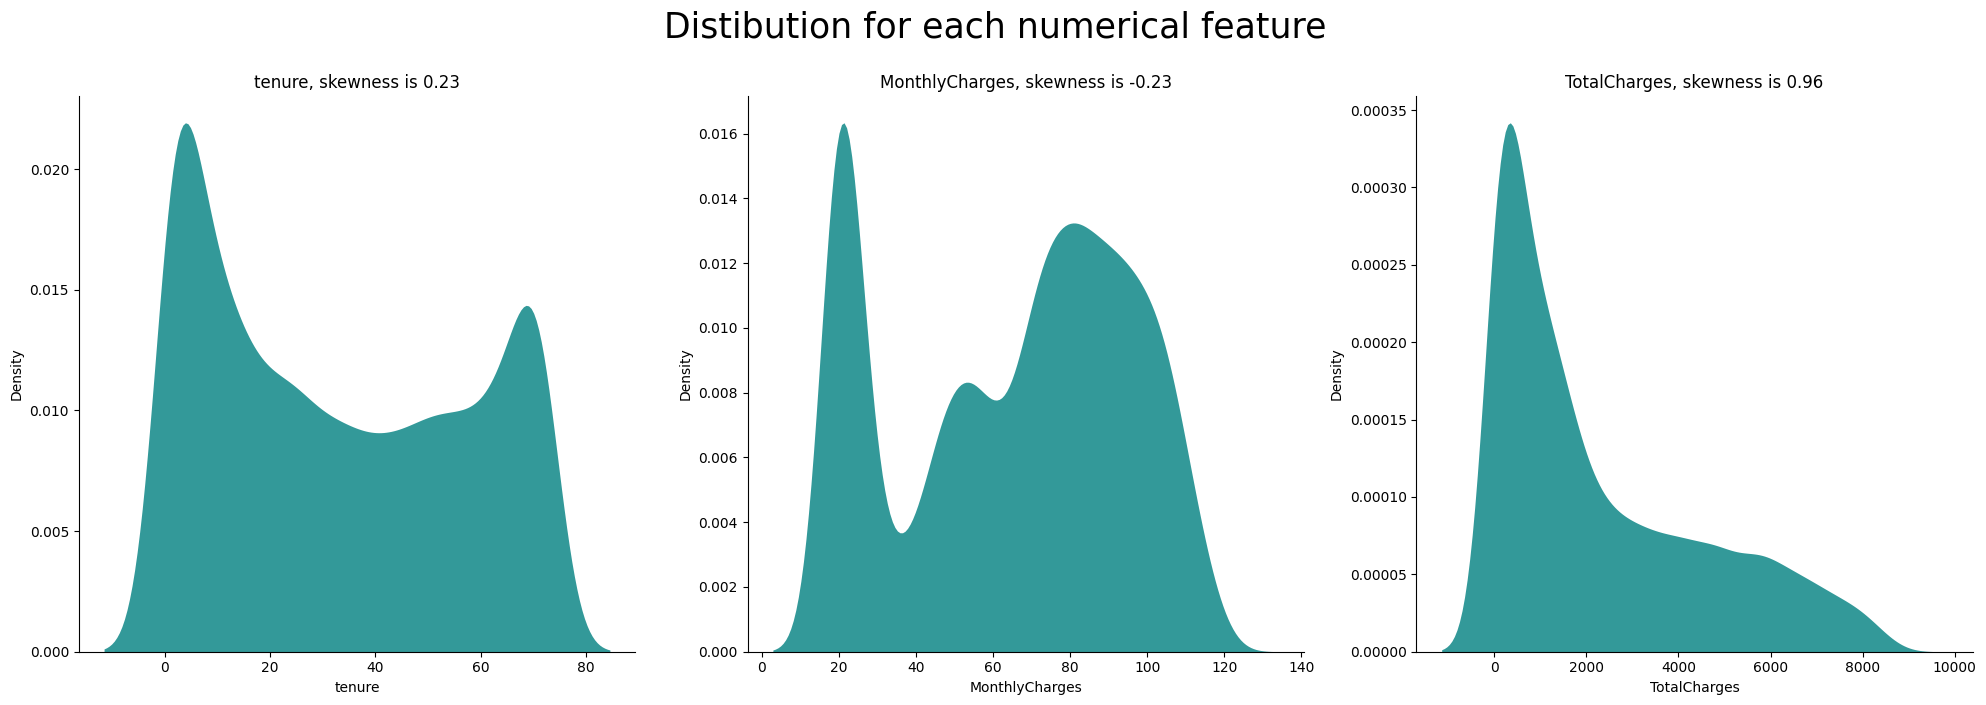

In [126]:
# Checking for distributions
def dist_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols,figsize=(20,7))
    fig.suptitle(suptitle,y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.kdeplot(dataset[data], ax=axs[i], fill=True, alpha=0.8, linewidth=0, color='#008080')
        axs[i].set_title(data + ', skewness is '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))
    sns.despine()
dist_custom(dataset=df1, columns_list=numeric_columns, rows=1, cols=3, suptitle='Distibution for each numerical feature')
plt.tight_layout()

## <b><span style='color:#E1B12D'> Checking for outliers - Inter Quartile Range (IQR) </span></b>

Inter Quartile Range (IQR) is one of the most extensively used procedure for outlier detection and removal.

Procedure:

- Find the first quartile, Q1.
- Find the third quartile, Q3.
- Calculate the IQR. IQR = Q3-Q1.
- Define the normal data range with lower limit as Q1–1.5 IQR and upper limit as Q3+1.5 IQR.

In [35]:

def IQR_method (df,n,features):
    """
    Takes a dataframe and returns an index list corresponding to the observations 
    containing more than n outliers according to the Tukey IQR method.
    """
    outlier_list = []
    
    for column in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[column], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[column],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        # outlier step
        outlier_step = 1.5 * IQR
        # Determining a list of indices of outliers
        outlier_list_column = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step )].index
        # appending the list of outliers 
        outlier_list.extend(outlier_list_column)
        
    # selecting observations containing more than x outliers
    outlier_list = Counter(outlier_list)        
    multiple_outliers = list( k for k, v in outlier_list.items() if v > n )
    
    # Calculate the number of records below and above lower and above bound value respectively
    out1 = df[df[column] < Q1 - outlier_step]
    out2 = df[df[column] > Q3 + outlier_step]
    
    print('Total number of deleted outliers is:', out1.shape[0]+out2.shape[0])
    
    return multiple_outliers

In [36]:
# Detecting and dropping outliers
Outliers_IQR = IQR_method(df,1,numeric_columns)
df_out = df.drop(Outliers_IQR, axis = 0).reset_index(drop=True)

Total number of deleted outliers is: 0


In [37]:
# Checking results
print ('The amount of frauds in df before dropping outliers: ', len(df[df['Churn'] == 1]))
print ('The amount of frauds in df after dropping outliers: ', len(df_out[df_out['Churn'] == 1]))

The amount of frauds in df before dropping outliers:  0
The amount of frauds in df after dropping outliers:  0


We don't have problem with outliers in this situation.

## <b> <span  style='color:#E1B12D'> Numerical Features vs Target Variable (Churn) </span><b>

In [42]:
#  Label Encoding refers to converting the labels into a numeric form. 
# This is only for EDA reasons. Later we will use OneHotEncoder to prepare for model building.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df1 = df.copy()

df1[categoric_columns] = df1[categoric_columns].apply(le.fit_transform)
df1[['Churn']] = df1[['Churn']].apply(le.fit_transform)

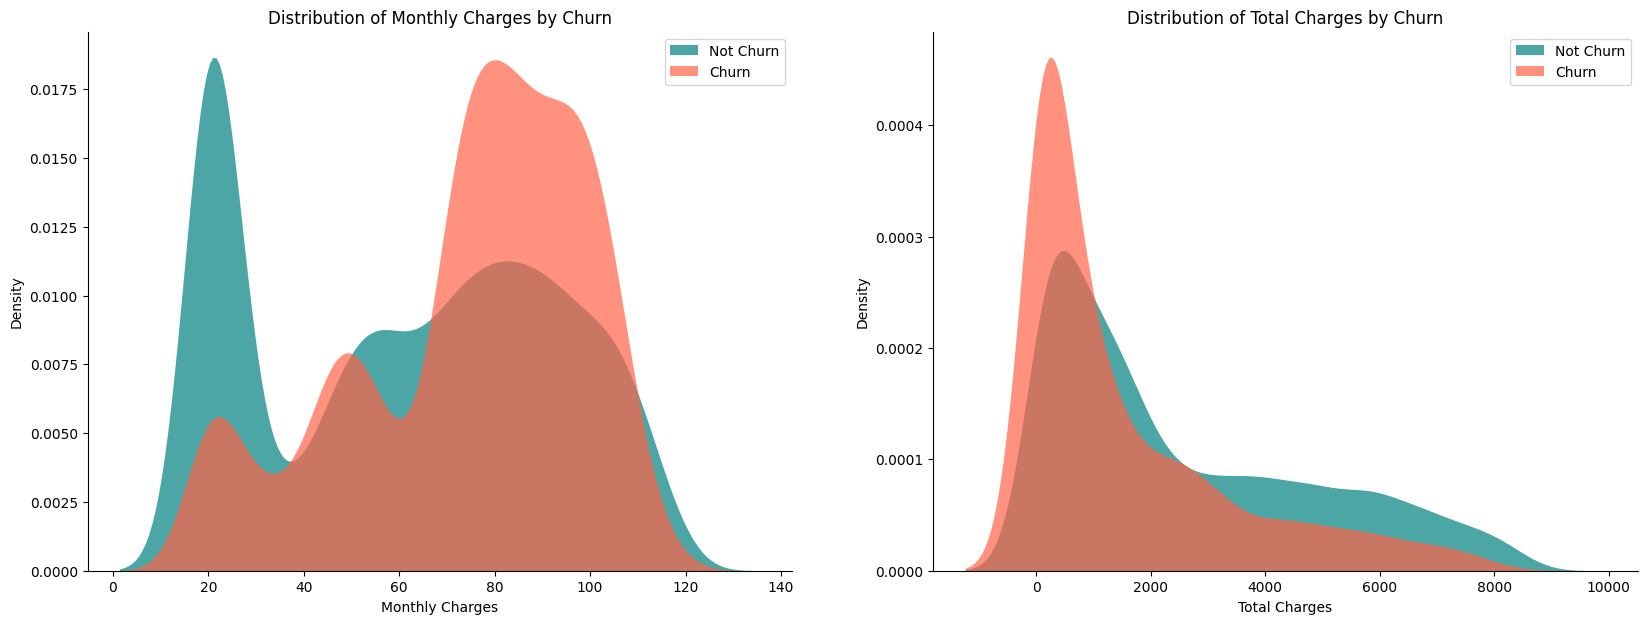

In [125]:
fig = plt.subplots(nrows = 1,ncols = 2,figsize = (20,7))

plt.subplot(1,2,1)
ax = sns.kdeplot(df1.MonthlyCharges[(df1["Churn"] == 0)], color='#008080', fill= True, alpha=.7, linewidth=0)
ax = sns.kdeplot(df1.MonthlyCharges[(df1["Churn"] == 1)], color='#FF6347', fill= True, alpha=.7, linewidth=0)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of Monthly Charges by Churn')

plt.subplot(1,2,2)
ax = sns.kdeplot(df1.TotalCharges[(df1["Churn"] == 0)], color='#008080', fill= True, alpha=.7, linewidth=0)
ax = sns.kdeplot(df1.TotalCharges[(df1["Churn"] == 1)], color='#FF6347', fill= True, alpha=.7, linewidth=0)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of Total Charges by Churn')
sns.despine()
plt.show()

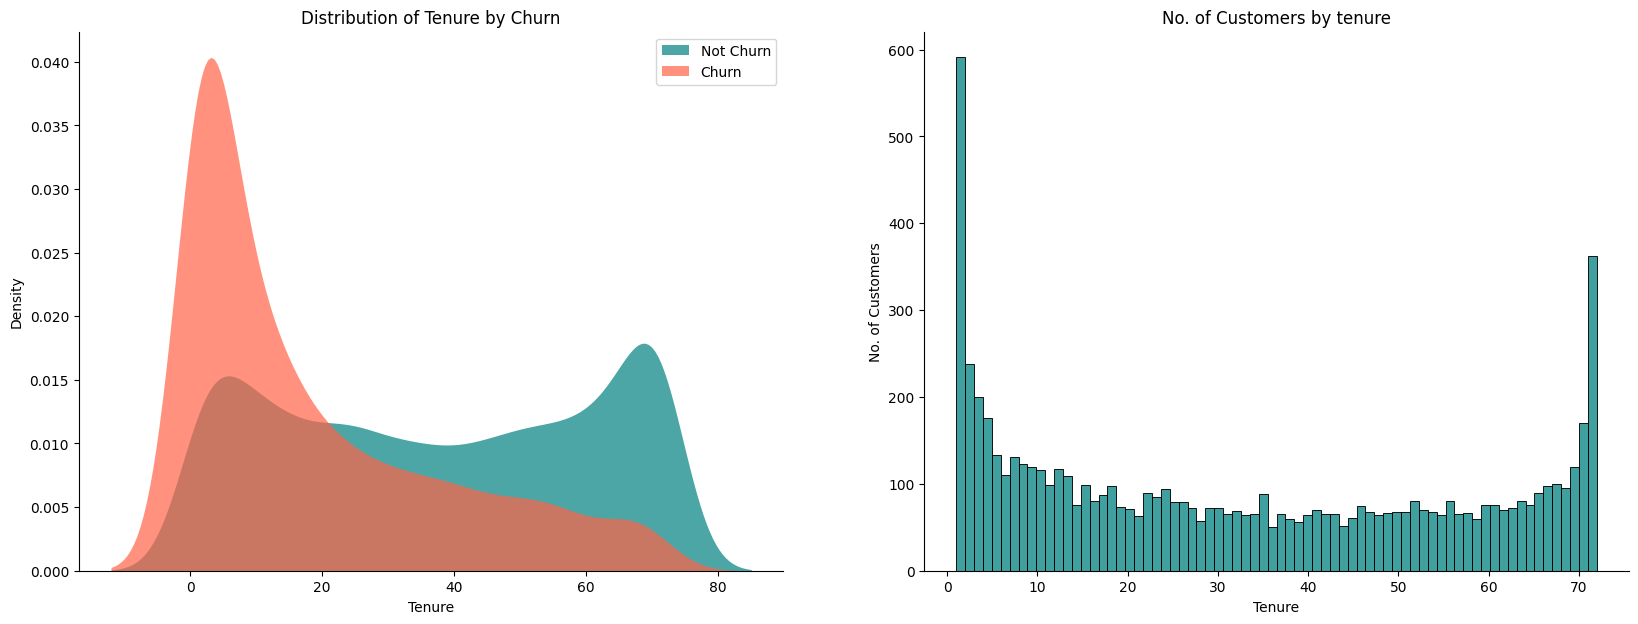

In [124]:
#plt.figure(figsize=(7,3))

fig = plt.subplots(nrows = 1,ncols = 2,figsize = (20,7))

plt.subplot(1,2,1)
ax = sns.kdeplot(df1.tenure[(df1["Churn"] == 0)], color='#008080', fill= True, alpha=.7, linewidth=0)
ax = sns.kdeplot(df1.tenure[(df1["Churn"] == 1)], color='#FF6347', fill= True, alpha=.7, linewidth=0)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Tenure')
ax.set_title('Distribution of Tenure by Churn')

plt.subplot(1,2,2)
ax = sns.histplot(df1["tenure"], bins=72, kde=False, color='#008080')
ax.set(title = "No. of Customers by tenure")
ax.set_ylabel('No. of Customers')
ax.set_xlabel('Tenure')
sns.despine()
plt.show()

The longer the customer has been with the provider the more likely he will not churn.

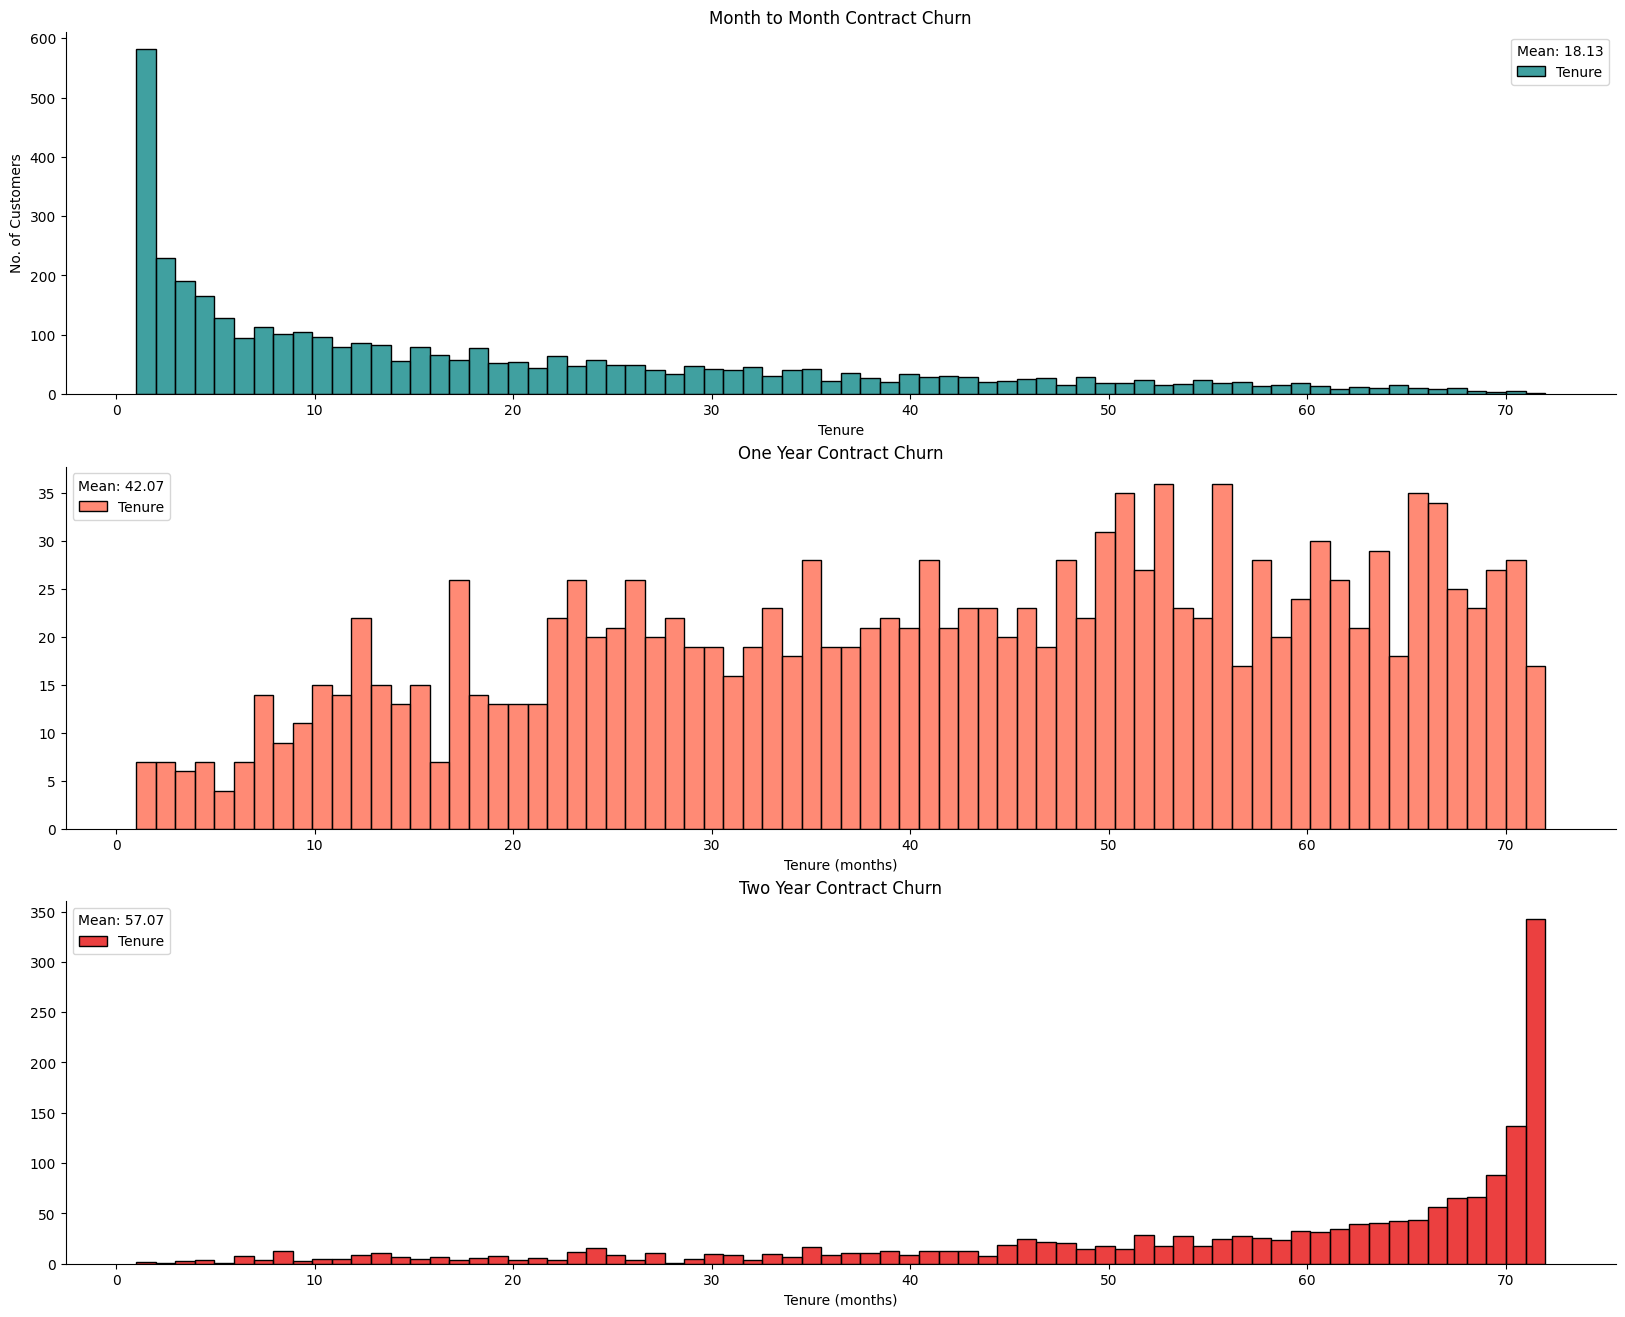

In [123]:
two_year_mean = round(df1[df1['Contract']==2]['tenure'].mean(),2)
month_mean = round(df1[df1['Contract']==0]['tenure'].mean(),2)
year_mean = round(df1[df1['Contract']==1]['tenure'].mean(),2)

fig = plt.subplots(nrows=3, ncols=1, figsize = (20,16))

plt.subplot(3,1,1)
ax = sns.histplot(df1[df1['Contract']==0]['tenure'], bins=72, color = '#008080')
ax.legend(['Tenure'],loc='upper right', title=(f'Mean: {month_mean}'))
ax.set_ylabel('No. of Customers')
ax.set_xlabel('Tenure')
ax.set_title('Month to Month Contract Churn')

plt.subplot(3,1,2)
ax = sns.histplot(df1[df1['Contract']==1]['tenure'], bins=72, color = '#FF6347')
ax.legend(['Tenure'],loc='upper left', title=(f'Mean: {year_mean}'))
ax.set_ylabel('')
ax.set_xlabel('Tenure (months)')
ax.set_title('One Year Contract Churn')

plt.subplot(3,1,3)
ax = sns.histplot(df1[df1['Contract']==2]['tenure'], bins=72, color = '#E50000')
ax.legend(['Tenure'],loc='upper left', title=(f'Mean: {two_year_mean}'))
ax.set_ylabel('')
ax.set_xlabel('Tenure (months)')
ax.set_title('Two Year Contract Churn')
sns.despine()
plt.show()

- a lot of Customers churned after just a month
- a lot of Customers are with the provider for 72 weeks
- the longer the contract, the longer customer stays with the provider (higher mean score)

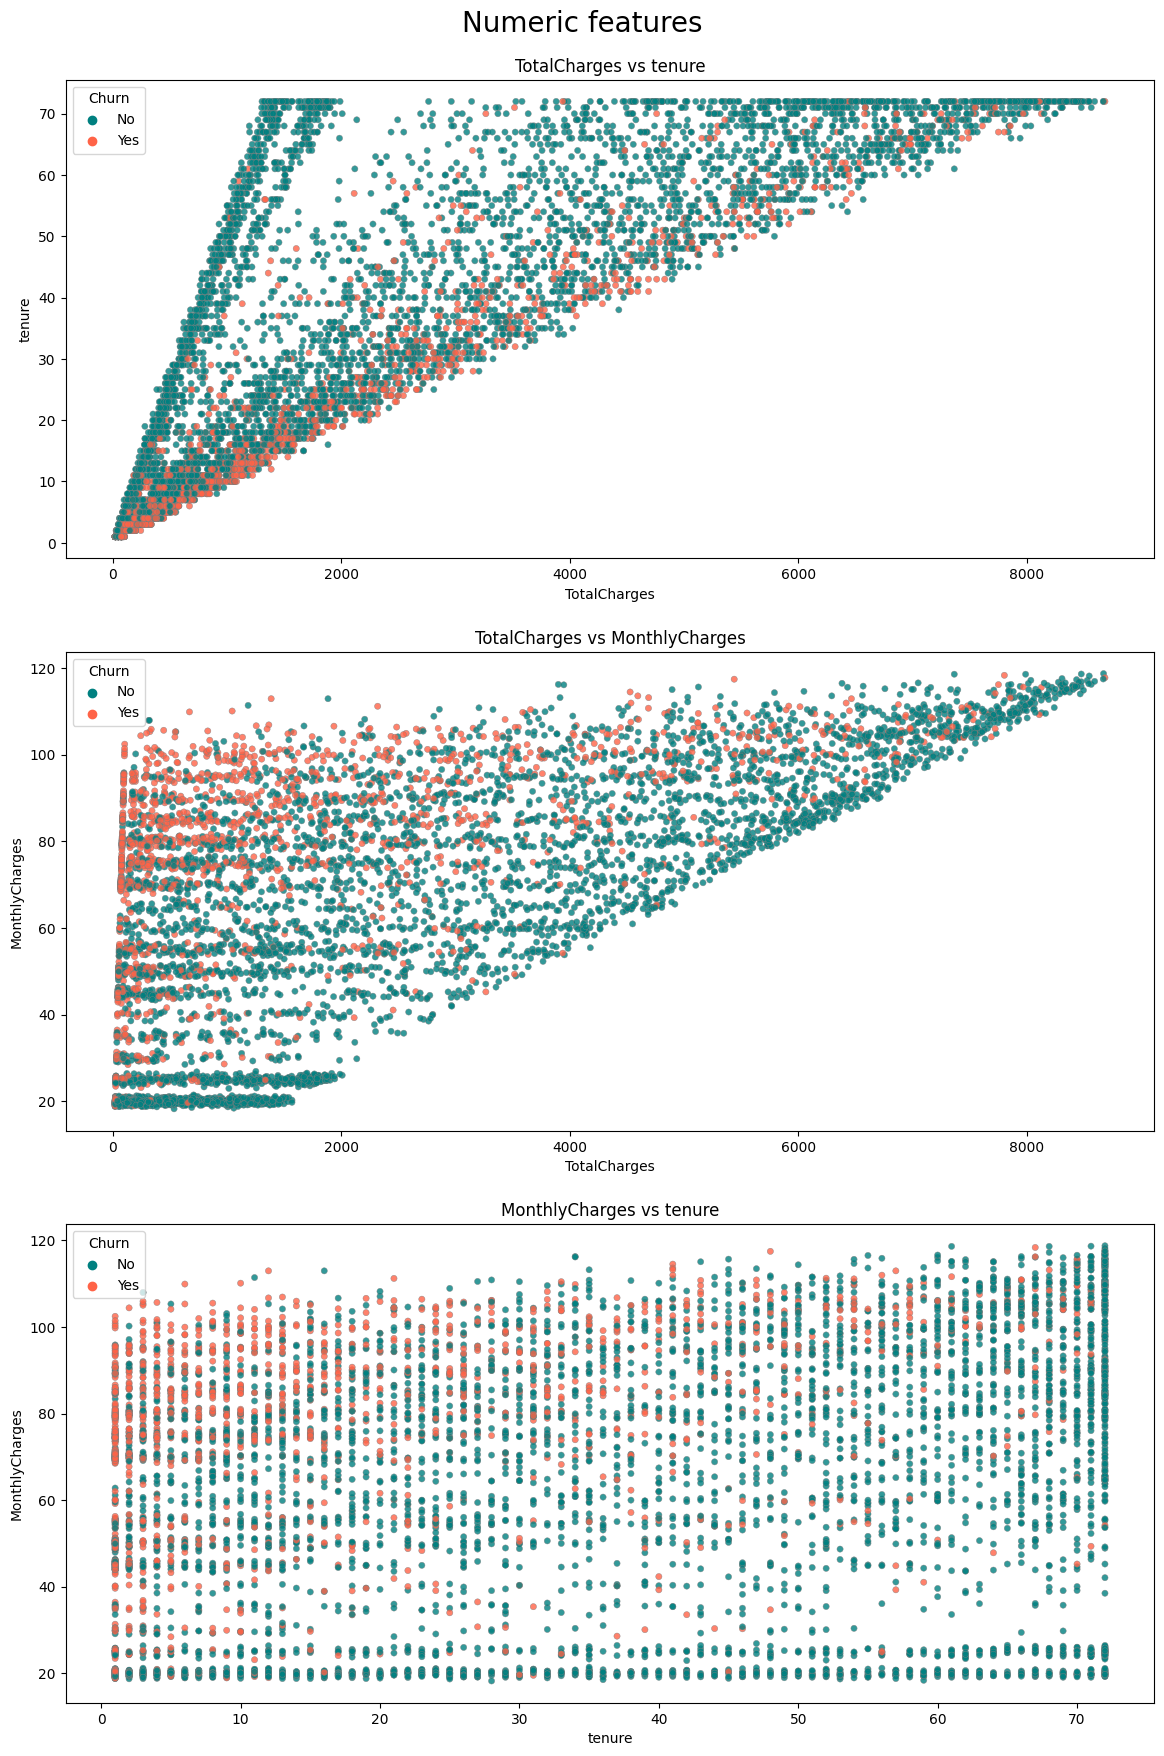

In [111]:
palette2 = ['#008080','#FF6347']

fig = plt.figure(figsize=(12,18))

plt.subplot(3,1,1)
ax1 = sns.scatterplot(x = df['TotalCharges'], y = df['tenure'], hue = "Churn",
                    data = df, palette = palette2, edgecolor='grey', alpha = 0.8, s=20)
plt.title('TotalCharges vs tenure')

plt.subplot(3,1,2)
ax2 = sns.scatterplot(x = df['TotalCharges'], y = df['MonthlyCharges'], hue = "Churn",
                    data = df, palette =palette2, edgecolor='grey', alpha = 0.8, s=20)
plt.title('TotalCharges vs MonthlyCharges')

plt.subplot(3,1,3)
ax2 = sns.scatterplot(x = df['tenure'], y = df['MonthlyCharges'], hue = "Churn",
                    data = df, palette =palette2, edgecolor='grey', alpha = .8, s=20)
plt.title('MonthlyCharges vs tenure')

fig.suptitle('Numeric features', fontsize = 20)
plt.tight_layout(pad=2)
plt.show()

<b><span> From the plots above we can conclude that: </span></b>
- a lot of customers churned after just a month;
- a lot of customers are with the provider for 72 weeks;
- the longer the contract, the longer customer stays with the provider (higher mean score);
- customers with higher Monthly Charges are more likely to churn;
- the longer the customer has been with the provider the more likely he will not churn.

## <b> <span  style='color:#E1B12D'> Categorical Features vs Target Variable (Churn) </span><b>


### Customer information

<b><span>Customer information:</span></b> (Gender, SeniorCitizen, Partner, Dependents)


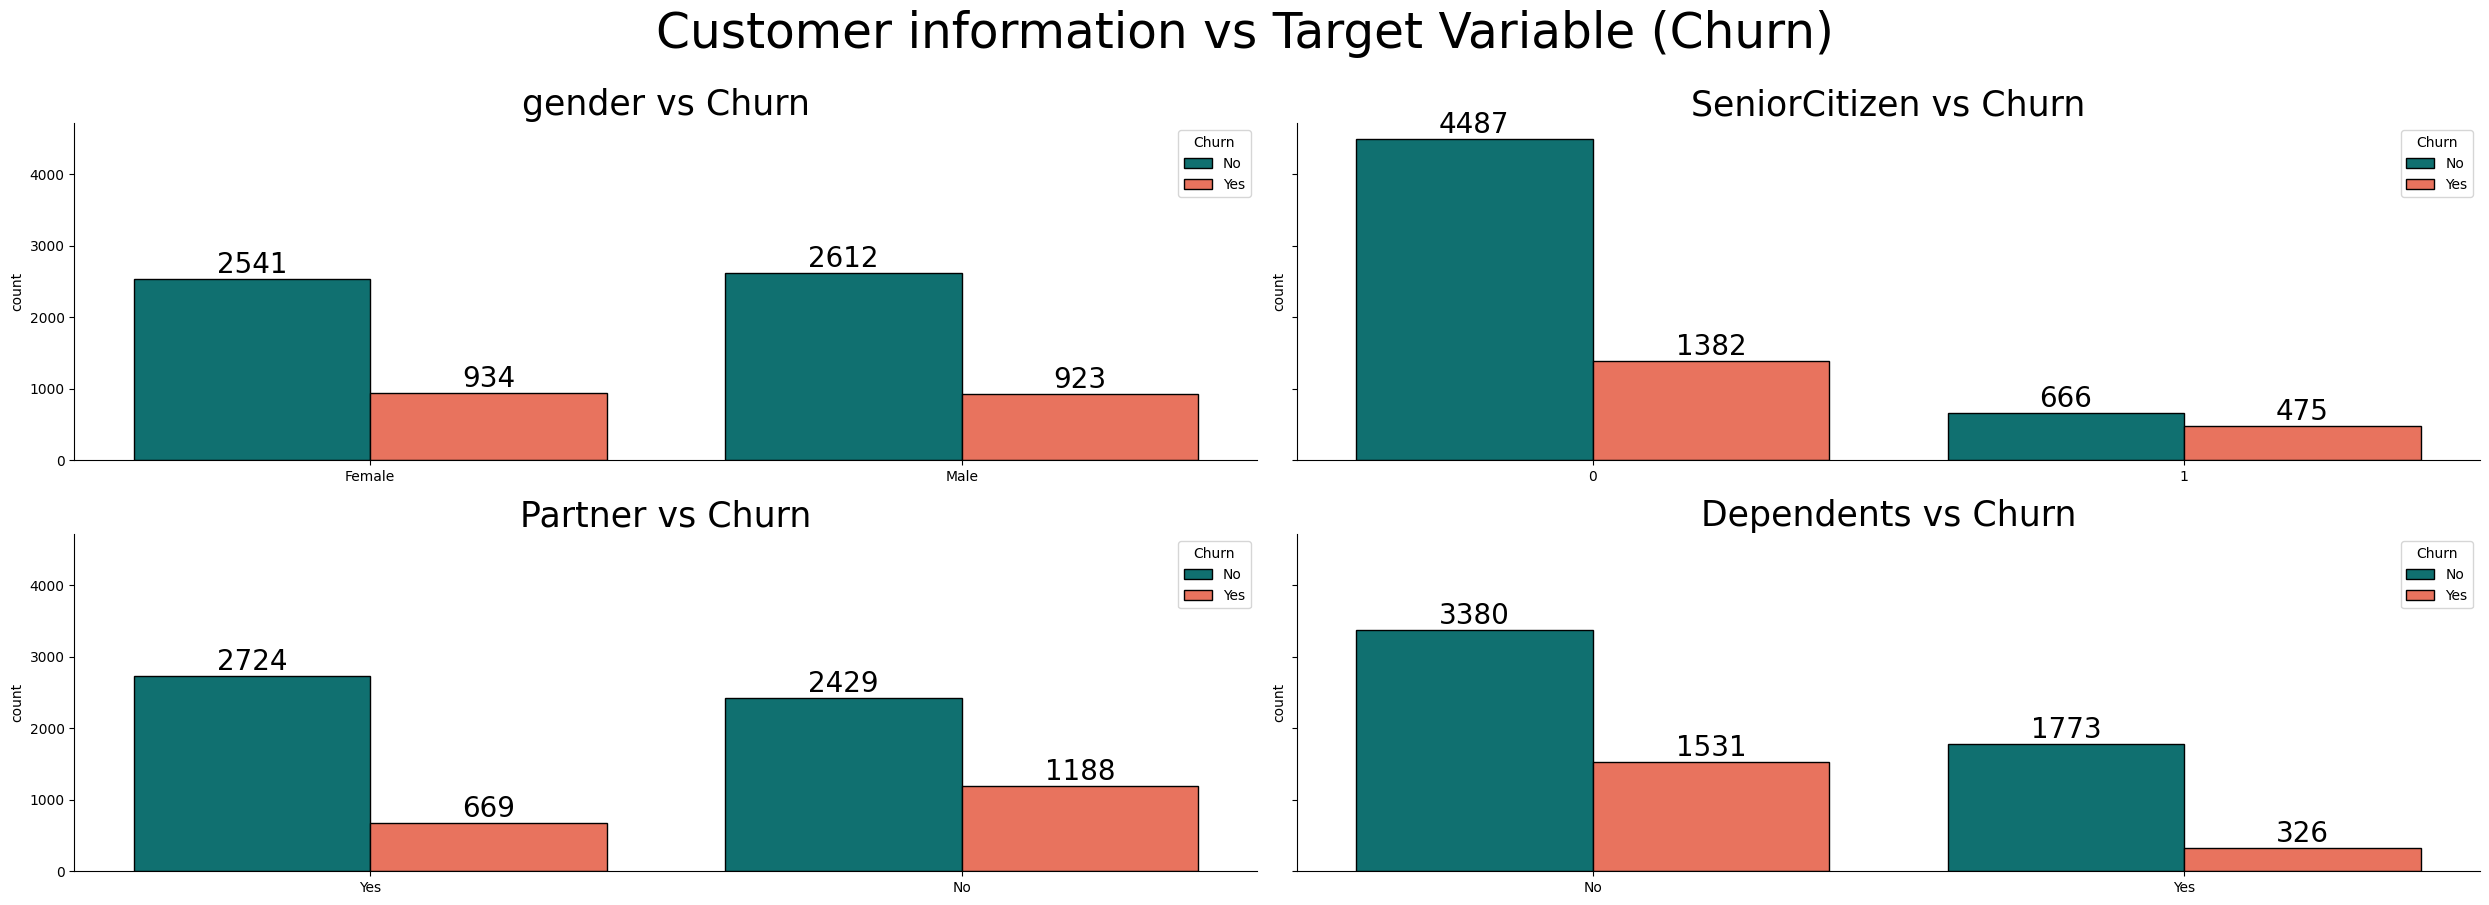

In [142]:
list1 = ['gender','SeniorCitizen','Partner','Dependents']
hue = "Churn"
figsize = (25,9)

# defining function for countplots
def countplots_custom(dataset, columns_list, rows, cols, figsize, suptitle, hue, palette):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=figsize)
    fig.suptitle(suptitle,y=1, size=35)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        ax=sns.countplot(data=dataset, ax=axs[i], x=columns_list[i], hue = hue, palette = palette, edgecolor = 'black')
        axs[i].set_title(data + f' vs {hue}', size=25)
        for i in ax.containers:
            ax.bar_label(i,size=20)
            ax.set_xlabel('')
    sns.despine()
        
countplots_custom(dataset=df, columns_list=list1, rows=2, cols=2, figsize=figsize, hue = hue, palette = palette, suptitle='Customer information vs Target Variable (Churn)')
plt.tight_layout()

In [113]:
gender = df1[df1['Churn'] == 1]['gender'].value_counts()
pie_values1 = [gender[0] / sum(gender) * 100, gender[1] / sum(gender) * 100]

senior = df1[df1['Churn'] == 1]['SeniorCitizen'].value_counts()
pie_values2 = [senior[0] / sum(senior) * 100, senior[1] / sum(senior) * 100]

partner = df1[df1['Churn'] == 1]['Partner'].value_counts()
pie_values3 = [partner[0] / sum(partner) * 100, partner[1] / sum(partner) * 100]

dependents = df1[df1['Churn'] == 1]['Dependents'].value_counts()
pie_values4 = [dependents[0] / sum(dependents) * 100, dependents[1] / sum(dependents) * 100]

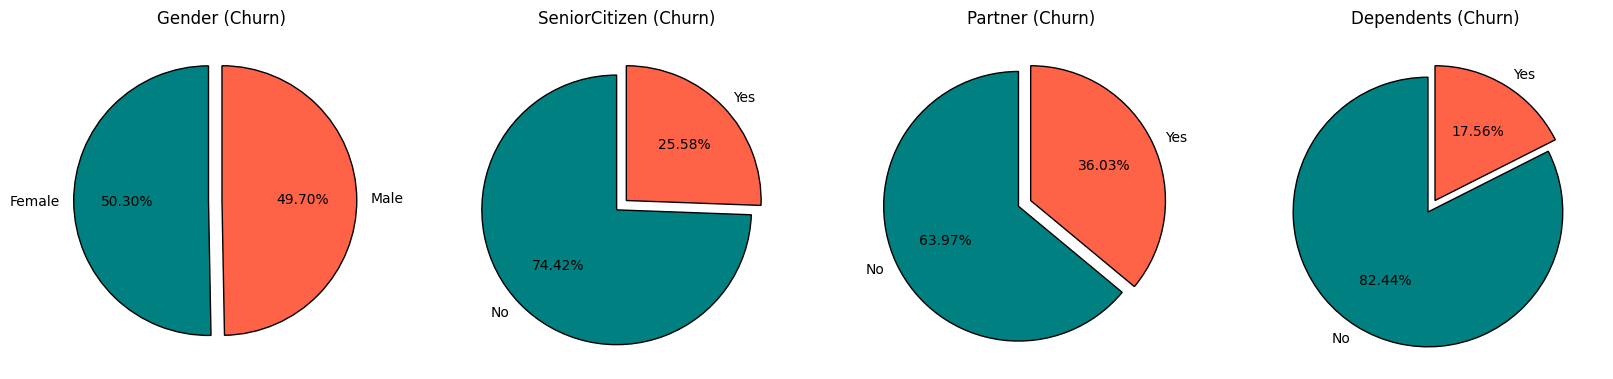

In [116]:
# percentage of churned customer from each category
ax,fig = plt.subplots(nrows = 1, ncols = 4, figsize = (20,20))

plt.subplot(1,4,1)
plt.pie(pie_values1,labels = ['Female','Male'],
        autopct='%1.2f%%',
        startangle = 90,
        explode = (0.1,0),
        colors = palette,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Gender (Churn)')

plt.subplot(1,4,2)
plt.pie(pie_values2,labels = ['No','Yes'],
        autopct='%1.2f%%',
        startangle = 90,
        explode = (0.1,0),
        colors = palette,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('SeniorCitizen (Churn)')

plt.subplot(1,4,3)
plt.pie(pie_values3,labels = ['No','Yes'],
        autopct='%1.2f%%',
        startangle = 90,
        explode = (0.1,0),
        colors = palette,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Partner (Churn)')

plt.subplot(1,4,4)
plt.pie(pie_values4,labels = ['No','Yes'],
        autopct='%1.2f%%',
        startangle = 90,
        explode = (0.1,0),
        colors = palette,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Dependents (Churn)')

plt.show()

Dependence between gender and possibility of churn is small. Much more interesting is with Partner, Dependents and SeniorCitizen features.

### Provided services

<b><span> Provided services :</span></b> (PhoneService, MultipleLines, InternetService, StreamingTV, StreamingMovies)

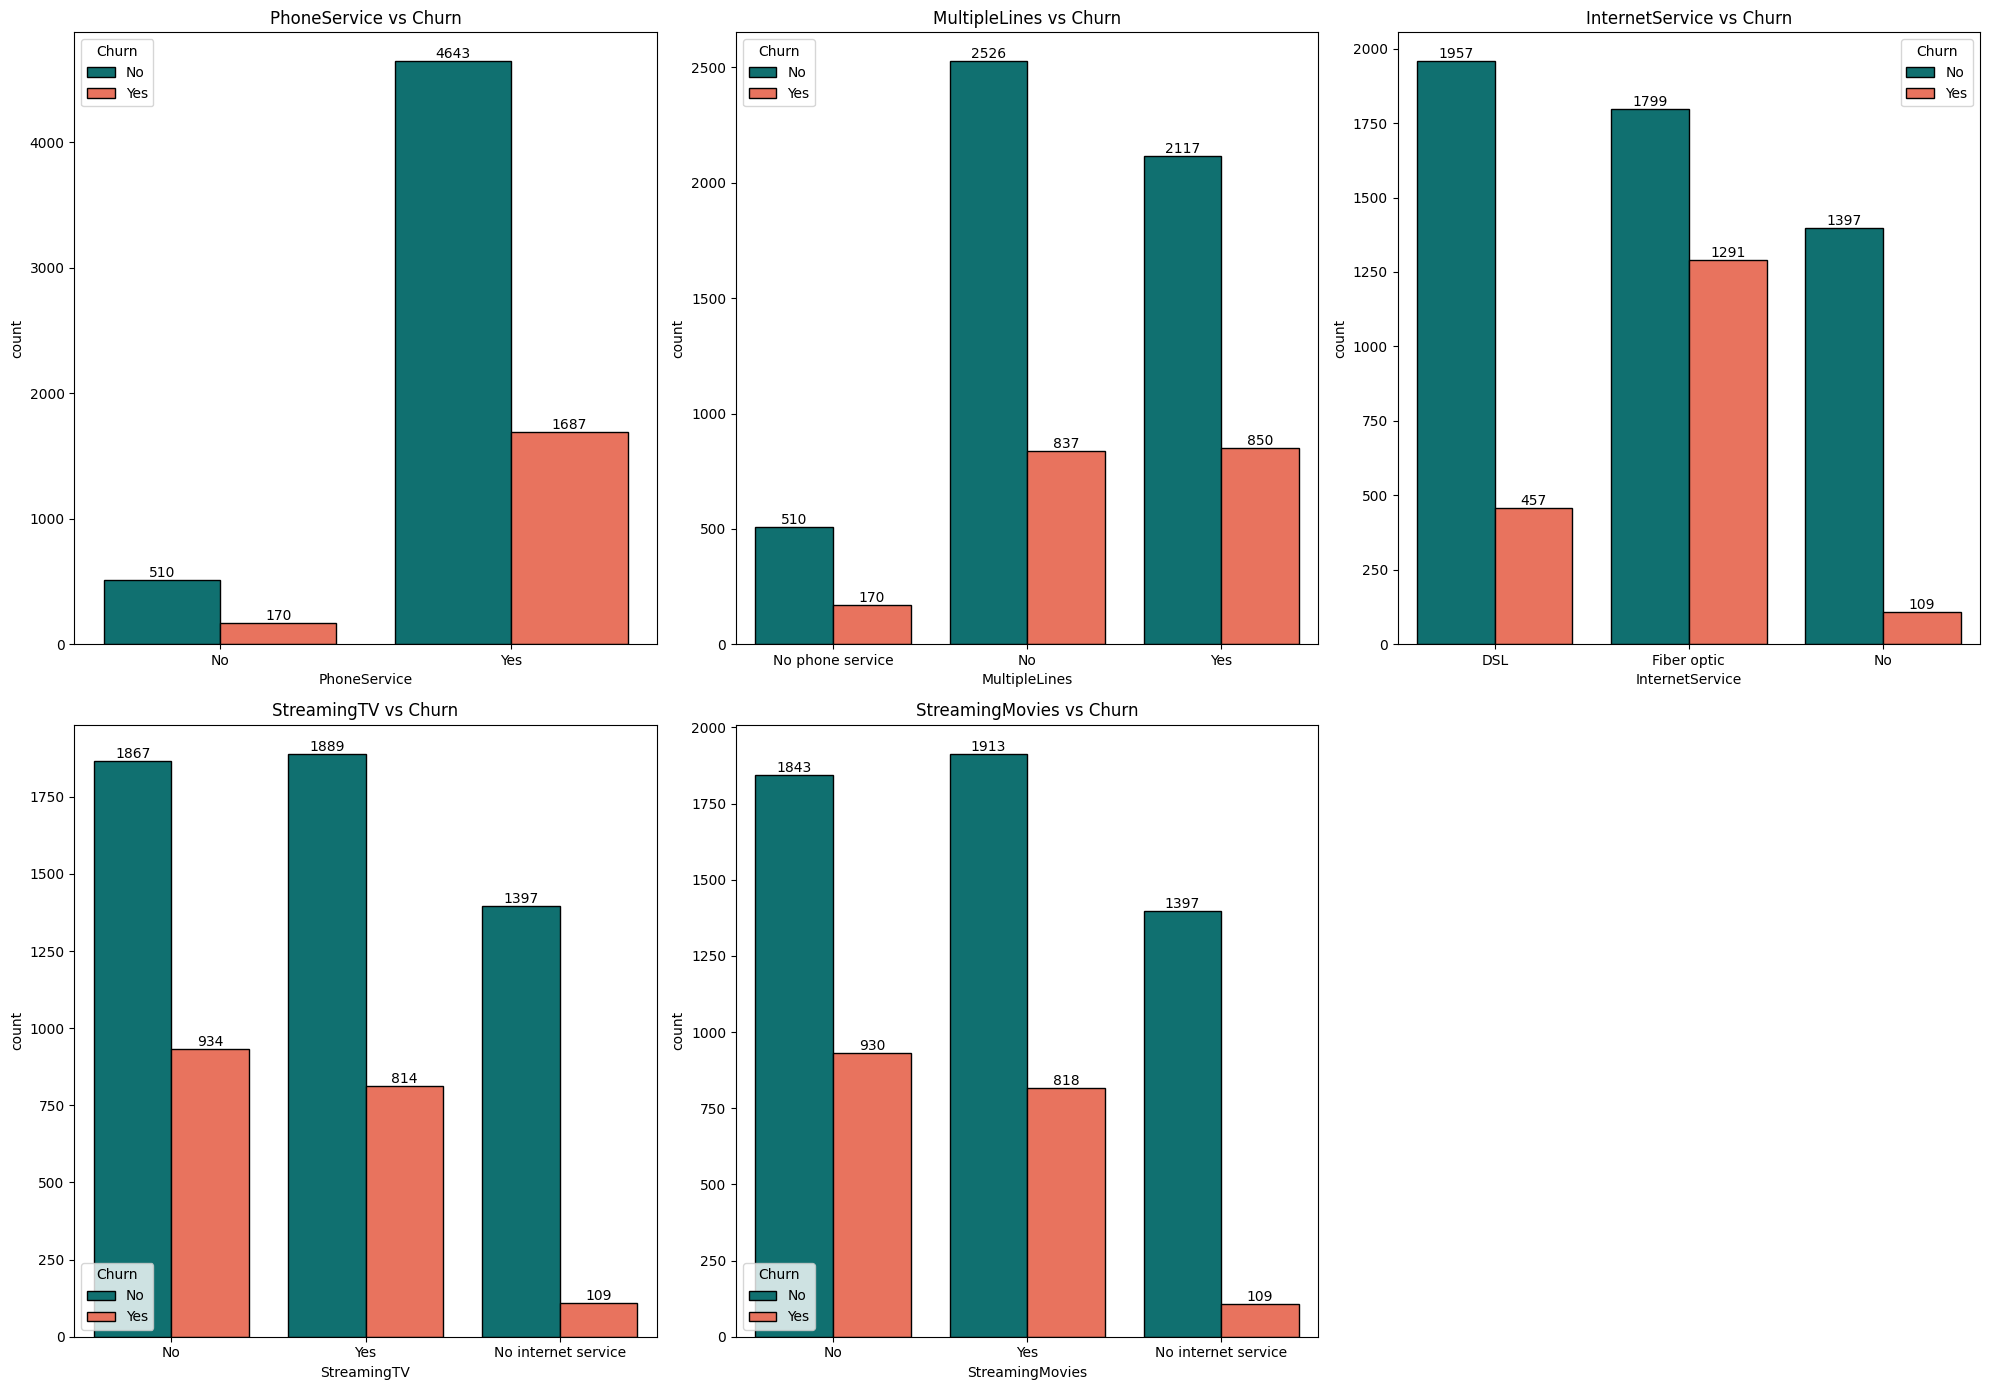

In [118]:
list2 = ['PhoneService', 'MultipleLines', 'InternetService', 'StreamingTV', 'StreamingMovies']
fig = plt.figure(figsize=(20,14))

plt.subplot(2,3,1)
ax = sns.countplot(data = df, x=list2[0], hue = "Churn", palette = palette2, edgecolor = 'black')
ax.legend(loc='upper left', title='Churn')
for i in ax.containers:
    ax.bar_label(i,)
title = list2[0] + ' vs Churn'
plt.title(title);

plt.subplot(2,3,2)
ax = sns.countplot(data = df, x=list2[1], hue = "Churn", palette = palette2, edgecolor = 'black')
ax.legend(loc='upper left', title='Churn')
for i in ax.containers:
    ax.bar_label(i,)
title = list2[1] + ' vs Churn'
plt.title(title);

plt.subplot(2,3,3)
ax = sns.countplot(data = df, x=list2[2], hue = "Churn", palette = palette2, edgecolor = 'black')
ax.legend(loc='upper right', title='Churn')
for i in ax.containers:
    ax.bar_label(i,)
title = list2[2] + ' vs Churn'
plt.title(title)

plt.subplot(2,3,4)
ax = sns.countplot(data = df, x=list2[3], hue = "Churn", palette = palette2, edgecolor = 'black')
ax.legend(loc='lower left', title='Churn')
for i in ax.containers:
    ax.bar_label(i,)
title = list2[3] + ' vs Churn'
plt.title(title);

plt.subplot(2,3,5)
ax = sns.countplot(data = df, x=list2[4], hue = "Churn", palette = palette2, edgecolor = 'black')
ax.legend(loc='lower left', title='Churn')
for i in ax.containers:
    ax.bar_label(i,)
title = list2[4] + ' vs Churn'
plt.title(title);

plt.tight_layout()
plt.show()


In [120]:
phone = df1[df1['Churn'] == 1]['PhoneService'].value_counts()
pie_values1 = [phone[0] / sum(phone) * 100, phone[1] / sum(phone) * 100]

MultipleLines = df1[df1['Churn'] == 1]['MultipleLines'].value_counts()
pie_values2 = [MultipleLines[0] / sum(MultipleLines) * 100, MultipleLines[1] / sum(MultipleLines) * 100, MultipleLines[2] / sum(MultipleLines) * 100]

InternetService = df1[df1['Churn'] == 1]['InternetService'].value_counts()
pie_values3 = [InternetService[0] / sum(InternetService) * 100, InternetService[1] / sum(InternetService) * 100, InternetService[2] / sum(InternetService) * 100]

StreamingTV = df1[df1['Churn'] == 1]['StreamingTV'].value_counts()
pie_values4 = [StreamingTV[0] / sum(StreamingTV) * 100, StreamingTV[1] / sum(StreamingTV) * 100, StreamingTV[2] / sum(StreamingTV) * 100]

StreamingMovies = df1[df1['Churn'] == 1]['StreamingMovies'].value_counts()
pie_values5 = [StreamingMovies[0] / sum(StreamingMovies) * 100, StreamingMovies[1] / sum(StreamingMovies) * 100, StreamingMovies[2] / sum(StreamingMovies) * 100]

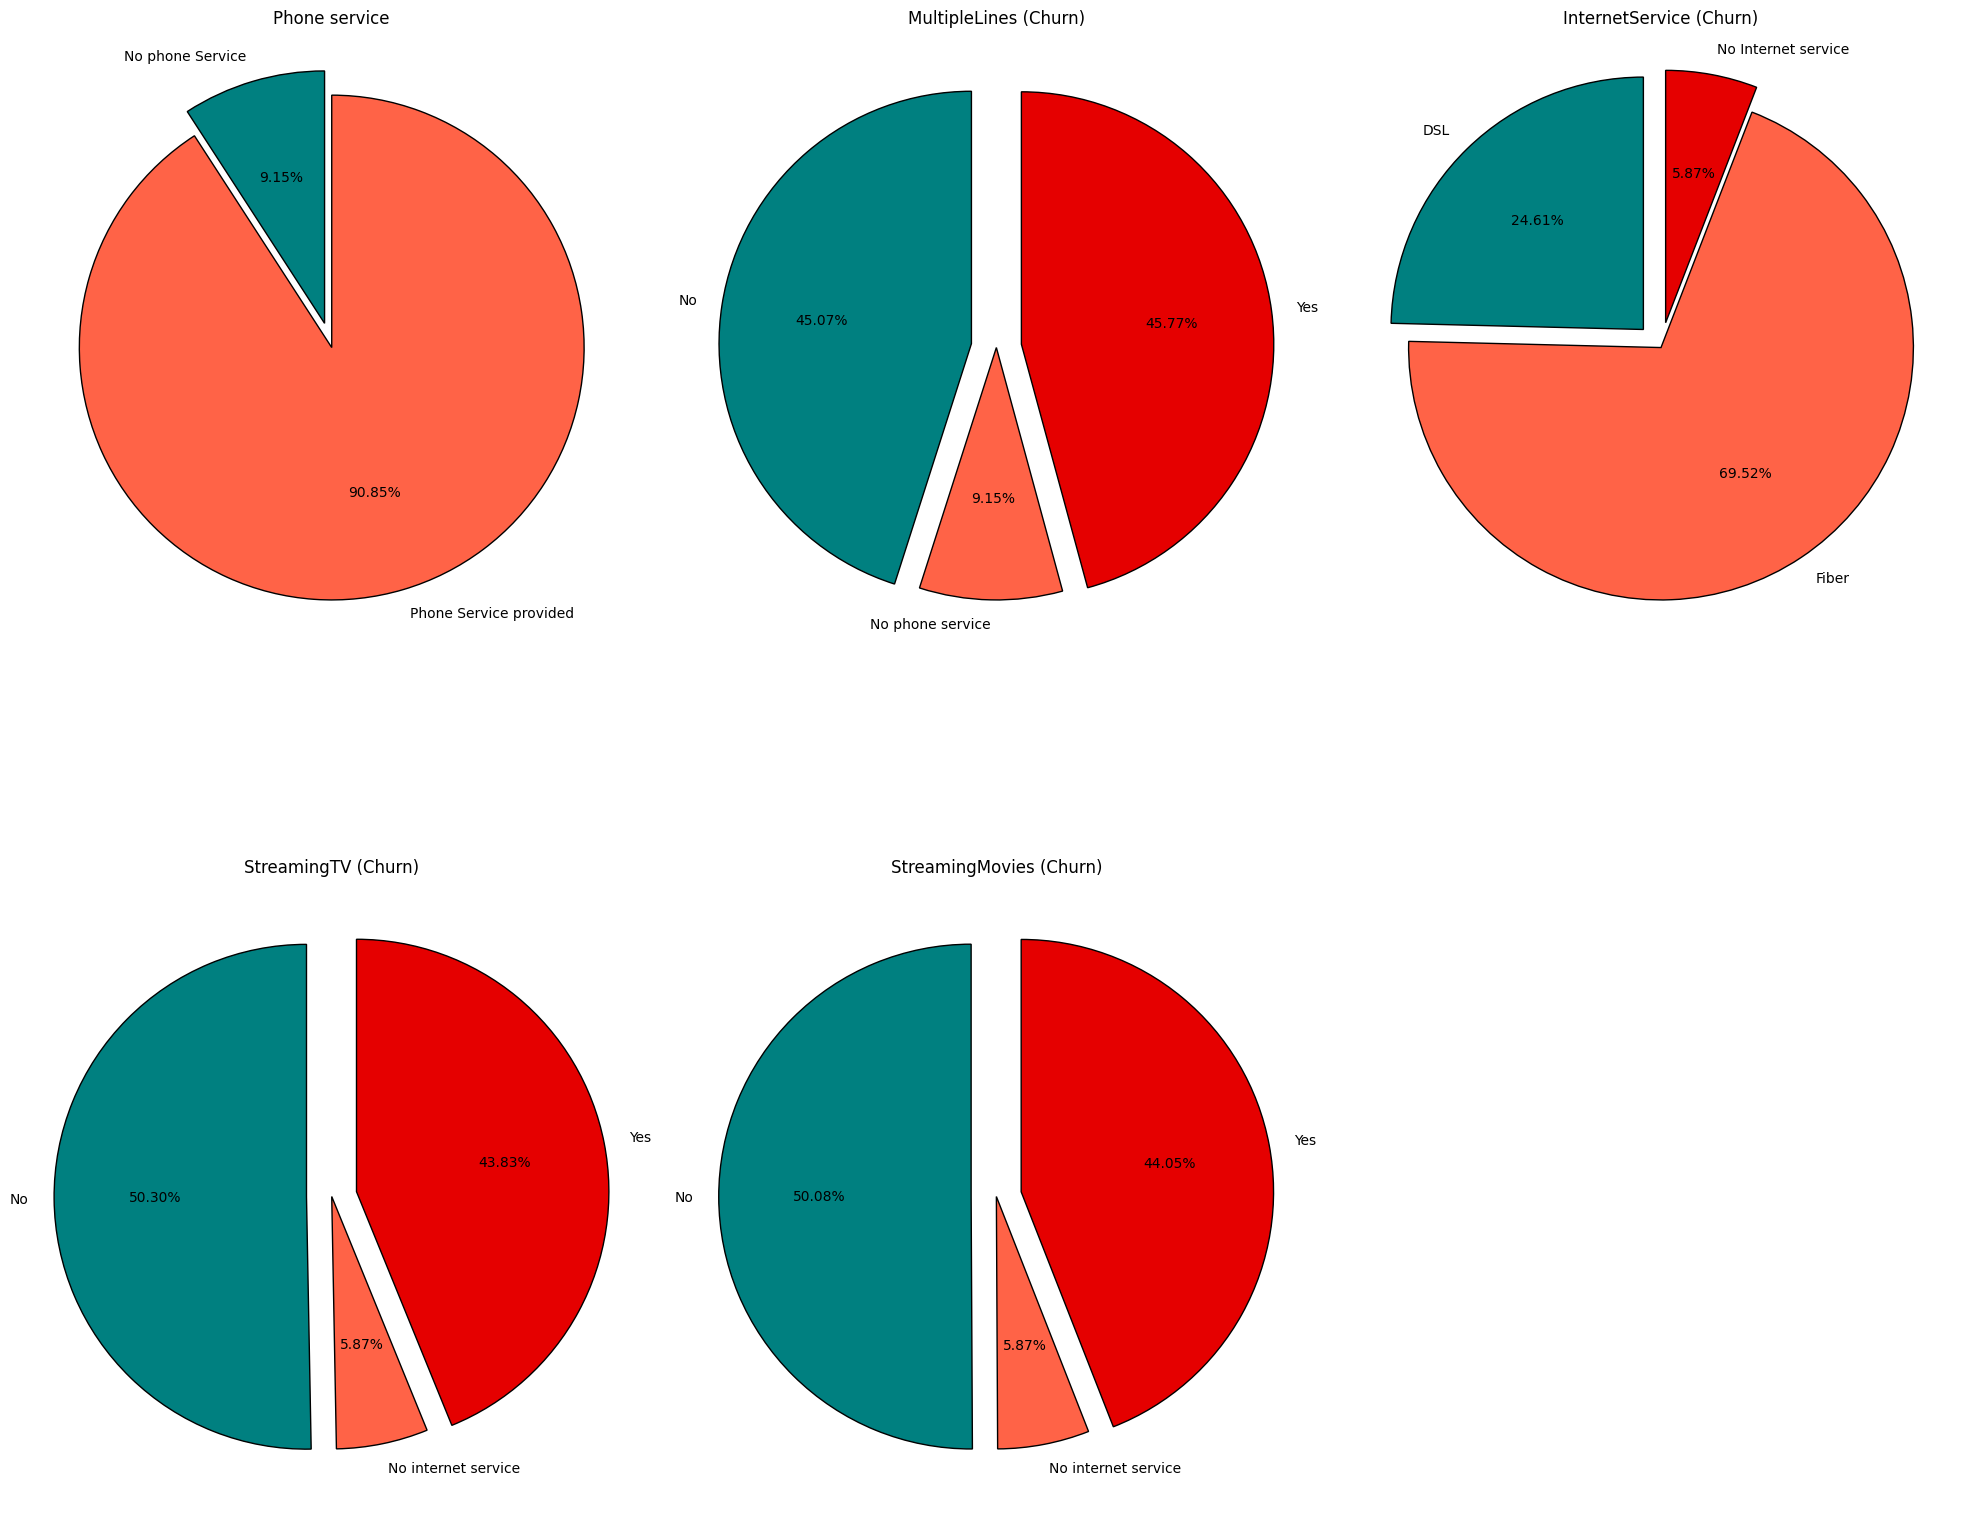

In [121]:
fig = plt.figure(figsize=(20,18))

plt.subplot(2,3,1)
plt.pie(pie_values1,labels = ['No phone Service','Phone Service provided'],
        autopct='%1.2f%%',
        startangle = 90,
        explode = (0.1,0),
        colors = palette,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Phone service')

plt.subplot(2,3,2)
plt.pie(pie_values2,labels = ['No','No phone service','Yes'],
        autopct='%1.2f%%',
        startangle = 90,
        explode = (0.1,0,0.1),
        colors = palette,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('MultipleLines (Churn)')

plt.subplot(2,3,3)
plt.pie(pie_values3,labels = ['DSL','Fiber','No Internet service'],
        autopct='%1.2f%%',
        startangle = 90,
        explode = (0.1,0,0.1),
        colors = palette,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('InternetService (Churn)')

plt.subplot(2,3,4)
plt.pie(pie_values4,labels = ['No','No internet service','Yes'],
        autopct='%1.2f%%',
        startangle = 90,
        explode = (0.1,0,0.1),
        colors = palette,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('StreamingTV (Churn)')

plt.subplot(2,3,5)
plt.pie(pie_values5,labels = ['No','No internet service','Yes'],
        autopct='%1.2f%%',
        startangle = 90,
        explode = (0.1,0,0.1),
        colors = palette,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('StreamingMovies (Churn)')

plt.tight_layout()
plt.show()


- A high number of customers who use Fiber for providing the Internet resigned from the service. On the contrary customers who are using DSL don't churn so often.

- Customers without internet have a very low churn rate.

### Support services

<b><span> Support services : </span></b> ( OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport )

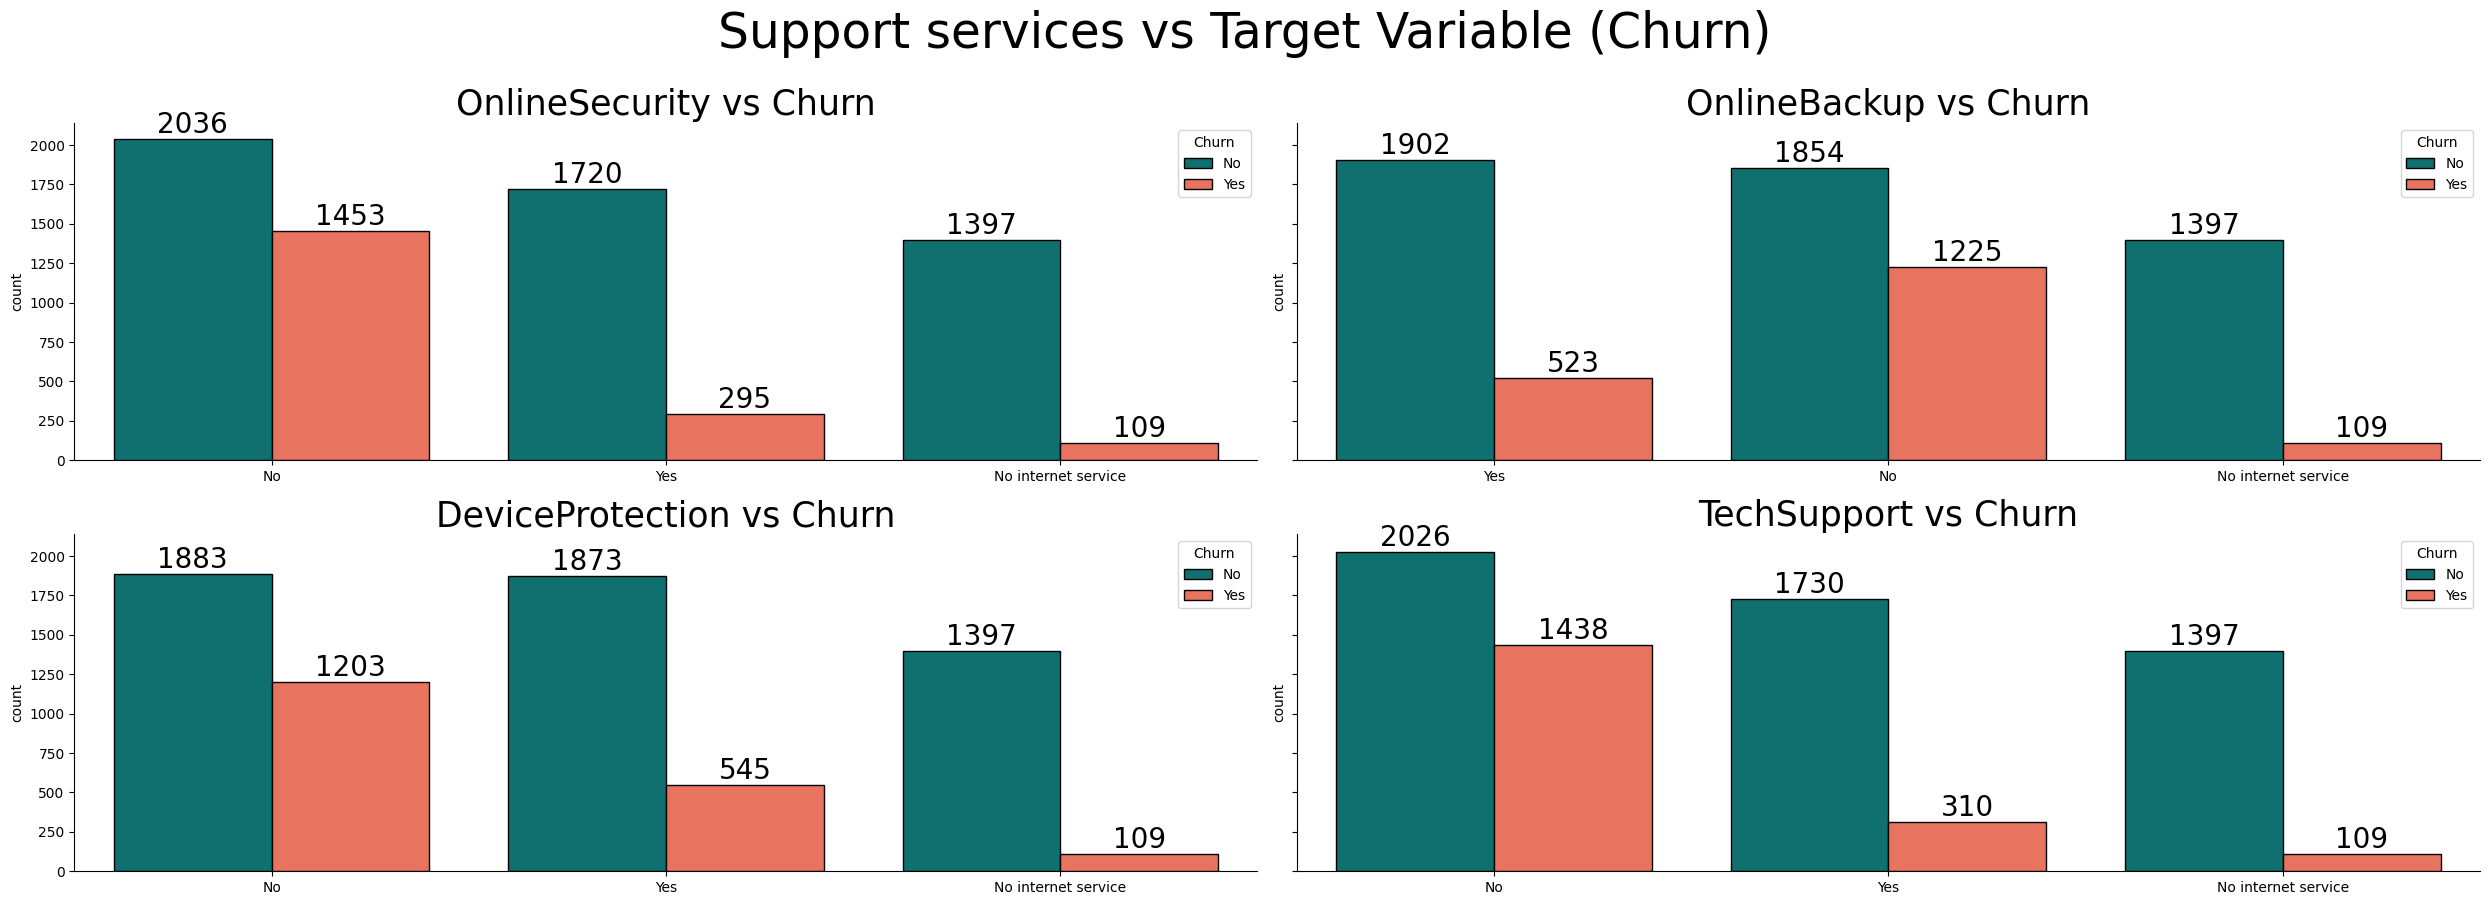

In [141]:
list3 = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']

countplots_custom(dataset=df, columns_list=list3, rows=2, cols=2, figsize=(25,9), hue = hue, palette = palette, suptitle='Support services vs Target Variable (Churn)')
plt.tight_layout()

In [143]:
pie_values1 = df1[df1['Churn'] == 1]['OnlineSecurity'].value_counts()
pie_values1 = [pie_values1[0] / sum(pie_values1) * 100, pie_values1[1] / sum(pie_values1) * 100, pie_values1[2] / sum(pie_values1) * 100]

pie_values2 = df1[df1['Churn'] == 1]['OnlineBackup'].value_counts()
pie_values2 = [pie_values2[0] / sum(pie_values2) * 100, pie_values2[1] / sum(pie_values2) * 100, pie_values2[2] / sum(pie_values2) * 100]

pie_values3 = df1[df1['Churn'] == 1]['DeviceProtection'].value_counts()
pie_values3 = [pie_values3[0] / sum(pie_values3) * 100, pie_values3[1] / sum(pie_values3) * 100, pie_values3[2] / sum(pie_values3) * 100]

pie_values4 = df1[df1['Churn'] == 1]['TechSupport'].value_counts()
pie_values4 = [pie_values4[0] / sum(pie_values4) * 100, pie_values4[1] / sum(pie_values4) * 100, pie_values4[2] / sum(pie_values4) * 100]

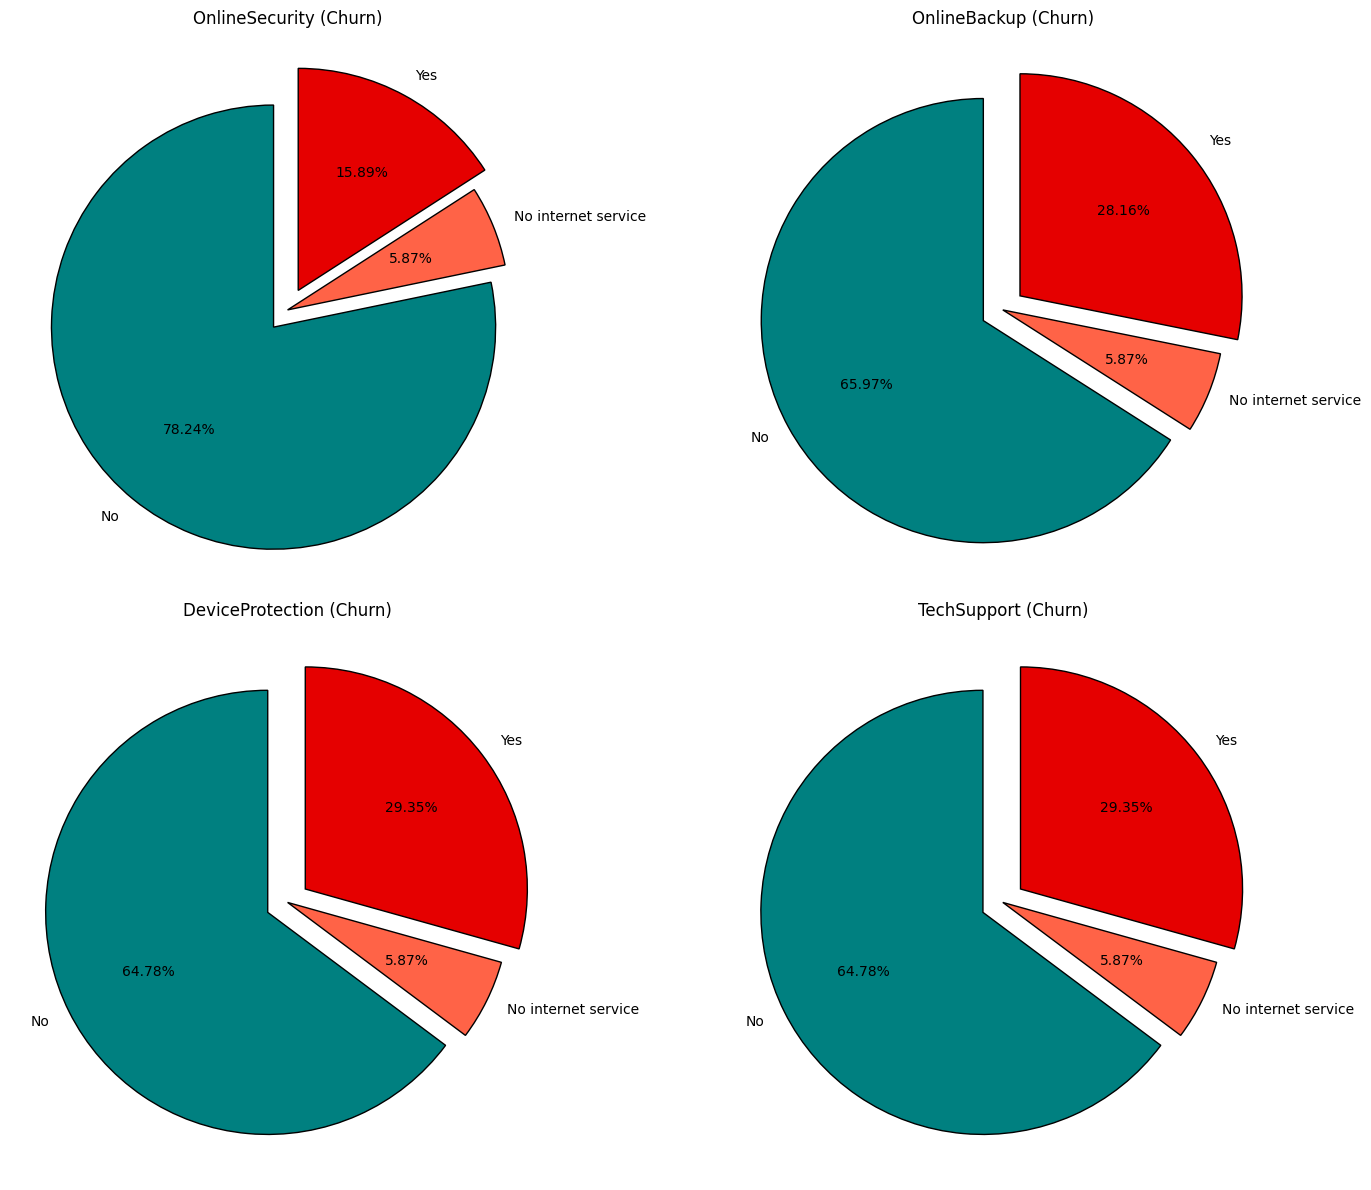

In [149]:
fig = plt.figure(figsize=(15,12))

plt.subplot(2,2,1)
plt.pie(pie_values1,labels = ['No','No internet service','Yes'],
        autopct='%1.2f%%',
        startangle = 90,
        explode = (0.1,0,0.1),
        colors = palette,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('OnlineSecurity (Churn)')

plt.subplot(2,2,2)
plt.pie(pie_values2,labels = ['No','No internet service','Yes'],
        autopct='%1.2f%%',
        startangle = 90,
        explode = (0.1,0,0.1),
        colors = palette,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('OnlineBackup (Churn)')

plt.subplot(2,2,3)
plt.pie(pie_values3,labels = ['No','No internet service','Yes'],
        autopct='%1.2f%%',
        startangle = 90,
        explode = (0.1,0,0.1),
        colors = palette,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('DeviceProtection (Churn)')

plt.subplot(2,2,4)
plt.pie(pie_values3,labels = ['No','No internet service','Yes'],
        autopct='%1.2f%%',
        startangle = 90,
        explode = (0.1,0,0.1),
        colors = palette,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('TechSupport (Churn)')
plt.tight_layout()
plt.show()


Customers who don't subscribe support services are more likely to churn.

### Payments

<b><span> Payments : </span></b> (Contract, PaperlessBilling, PaymentMethod )

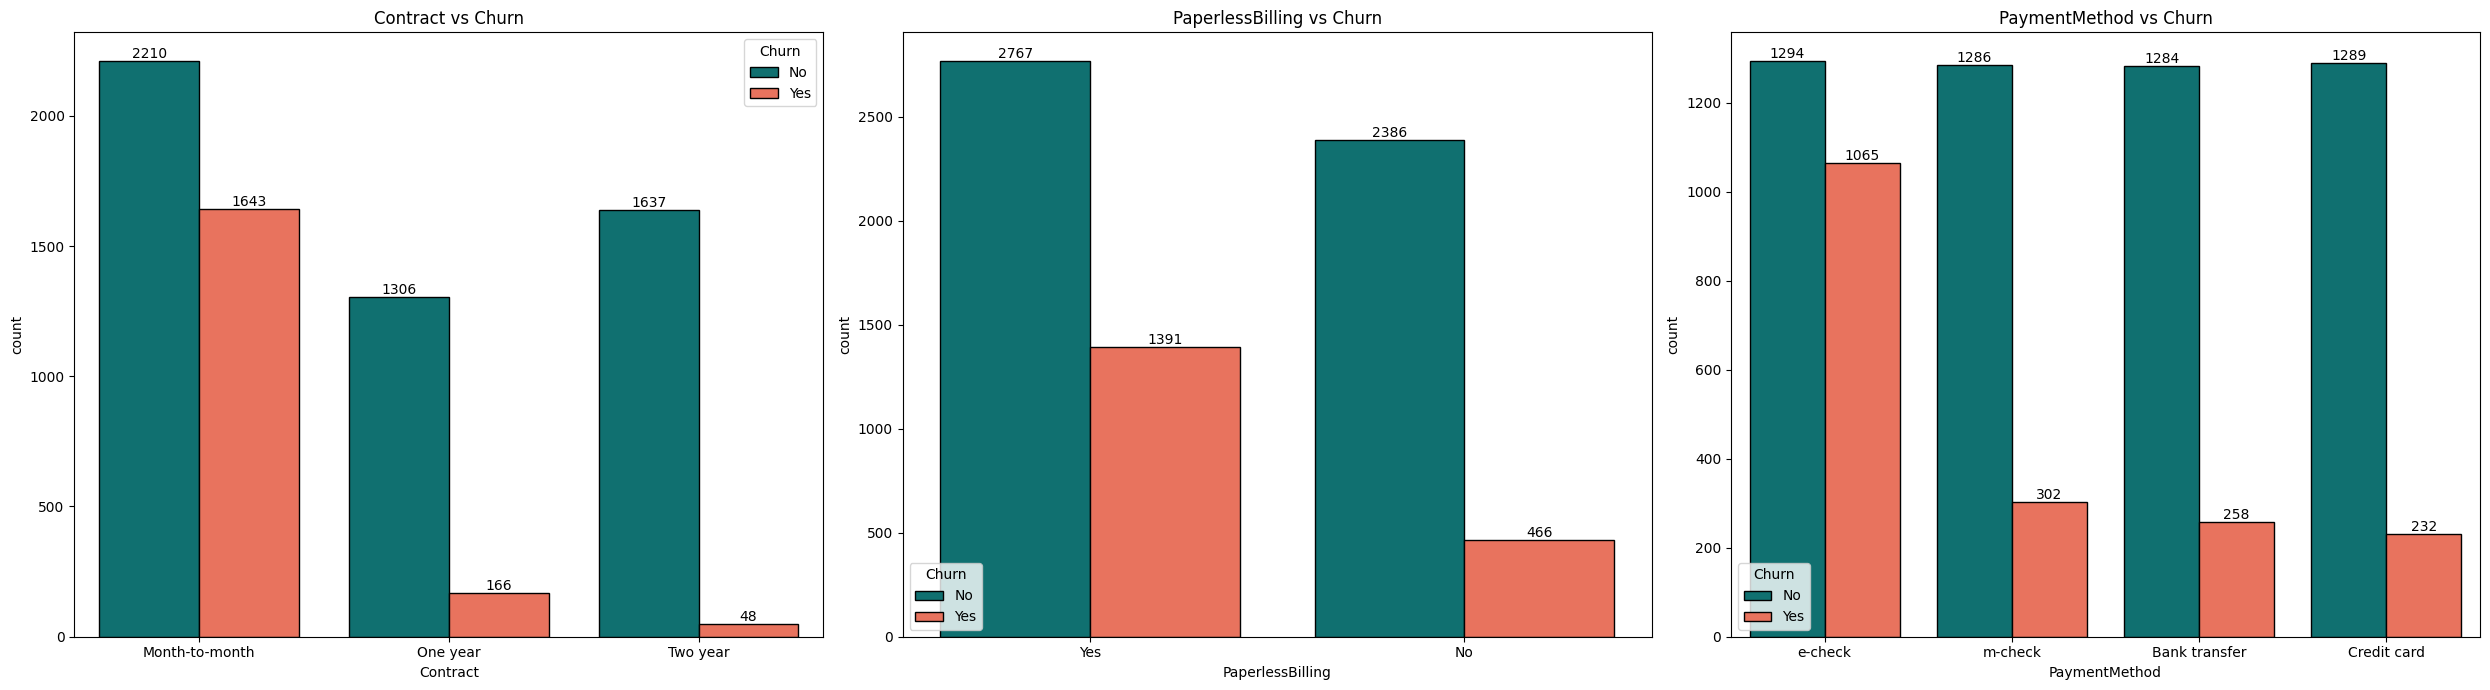

In [151]:
list3 = ['Contract','PaperlessBilling','PaymentMethod']

fig = plt.subplots(nrows = 1, ncols = 3, figsize = (25,7))

plt.subplot(1,3,1)
ax = sns.countplot(data = df, x=list3[0], hue = "Churn", palette = palette2, edgecolor = 'black')
ax.legend(loc='upper right', title='Churn')
for i in ax.containers:
    ax.bar_label(i,)
title = list3[0] + ' vs Churn'
plt.title(title);

plt.subplot(1,3,2)
ax = sns.countplot(data = df, x=list3[1], hue = "Churn", palette = palette2, edgecolor = 'black')
ax.legend(loc='lower left', title='Churn')
for i in ax.containers:
    ax.bar_label(i,)
title = list3[1] + ' vs Churn'
plt.title(title);

plt.subplot(1,3,3)
ax = sns.countplot(data = df, x=list3[2], hue = "Churn", palette = palette2, edgecolor = 'black')
ax.legend(loc='lower left', title='Churn')
for i in ax.containers:
    ax.bar_label(i,)
ax.set_xticklabels(['e-check','m-check','Bank transfer','Credit card'])
title = list3[2] + ' vs Churn'
plt.title(title)

plt.tight_layout()
plt.show()


In [152]:
contract = df1[df1['Churn'] == 1]['Contract'].value_counts()
pie_values1 = [contract[0] / sum(contract) * 100, contract[1] / sum(contract) * 100, contract[2] / sum(contract) * 100]

paperless = df1[df1['Churn'] == 1]['PaperlessBilling'].value_counts()
pie_values2 = [paperless[0] / sum(paperless) * 100, paperless[1] / sum(paperless) * 100] 

payment = df1[df1['Churn'] == 1]['PaymentMethod'].value_counts()
pie_values3 = [payment[0] / sum(payment) * 100, payment[1] / sum(payment) * 100, payment[2] / sum(payment) * 100, payment[3] / sum(payment) * 100] 

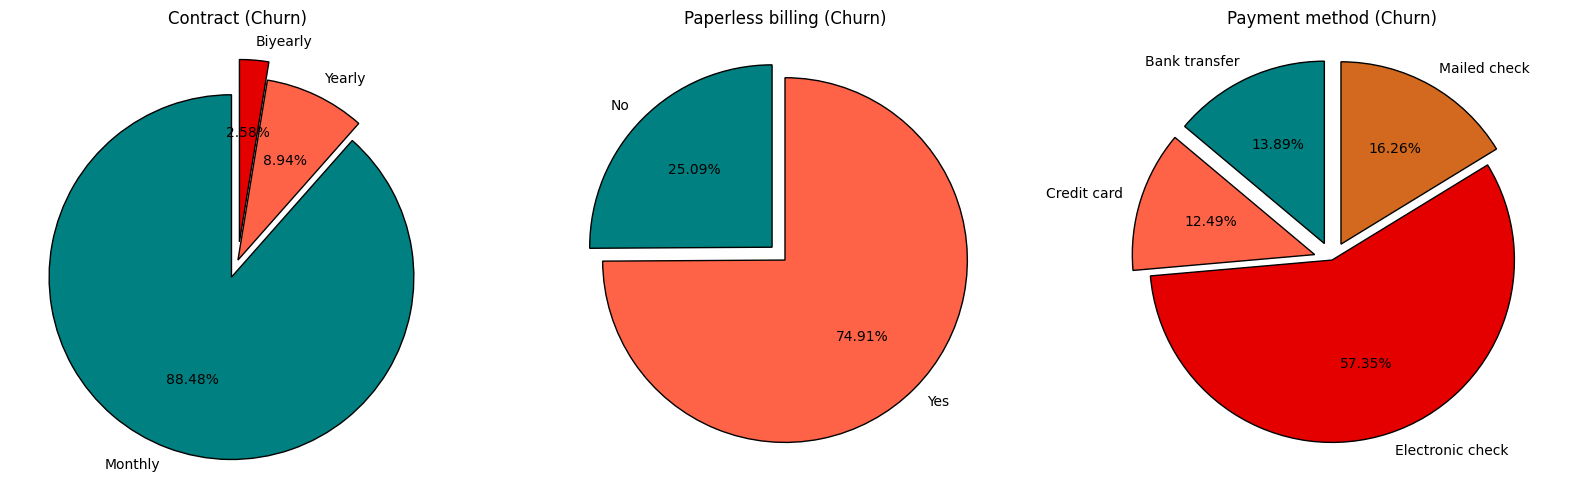

In [153]:
ax,fig = plt.subplots(nrows = 1,ncols = 3,figsize = (20,20))

plt.subplot(1,3,1)
plt.pie(pie_values1,labels = ['Monthly','Yearly','Biyearly'],
        autopct='%1.2f%%',
        startangle = 90,
        explode = (0.1,0,0.1),
        colors = palette,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Contract (Churn)')

plt.subplot(1,3,2)
plt.pie(pie_values2,labels = ['No','Yes'],
        autopct='%1.2f%%',
        startangle = 90,
        explode = (0.1,0),
        colors = palette,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Paperless billing (Churn)')

plt.subplot(1,3,3)
plt.pie(pie_values3,labels = ['Bank transfer','Credit card','Electronic check','Mailed check'],
        autopct='%1.2f%%',
        startangle = 90,
        explode = (0.1,0.1,0,0.1),
        colors = palette,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Payment method (Churn)')

plt.show()

- Short term contracts have much higher churn rates.

- Customers with paperless billing are more probable to churn.

- Customers with electronic check as a payment method are much more likely to churn.



<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700"><span style='color:#CDA63A'></span> Feature Engineering</div>


## <b> <span  style='color:#E1B12D'> Train test split - stratified splitting </span><b>



In [186]:
df3=df
df3[['Churn']] = df3[['Churn']].apply(le.fit_transform) # Applying LabelEncoder to 'Churn' column

X = df3.drop('Churn', axis=1)
y = df3['Churn']

### Feature scaling

In [187]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.25, random_state = 42)

In [188]:
from sklearn.preprocessing import StandardScaler
Standard_Scaler = StandardScaler()
Standard_Scaler.fit_transform(X_train[numeric_columns])
Standard_Scaler.transform(X_test[numeric_columns])

array([[ 0.27610257,  1.01769998,  0.61931885],
       [-1.24037213, -1.53347618, -0.98780549],
       [-1.28135793, -1.33620306, -0.99803605],
       ...,
       [-1.19938633,  0.13498634, -0.90549797],
       [-0.05178385,  0.98259205,  0.30461881],
       [ 0.39905998,  1.17652156,  0.85307838]])

### One hot Encoder

In [189]:
print(categoric_columns)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [190]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
# Encoding multiple columns. Unfortunately you cannot pass a list here so you need to copy-paste all printed categorical columns.
transformer = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), 
     ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 
      'PhoneService', 'MultipleLines', 'InternetService', 
      'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
      'TechSupport', 'StreamingTV', 'StreamingMovies', 
      'Contract', 'PaperlessBilling', 'PaymentMethod']))

In [191]:
# Transforming
transformed = transformer.fit_transform(X_train)
# Transformating back
transformed_df = pd.DataFrame(transformed, columns=transformer.get_feature_names_out())
# One-hot encoding removed index. Let's put it back:
transformed_df.index = X_train.index

# Joining tables
X_train = pd.concat([X_train, transformed_df], axis=1)

X_train.drop(categoric_columns, axis=1, inplace=True) # Dropping categorical columns

In [192]:
# Transforming
transformed = transformer.transform(X_test)
# Transformating back
transformed_df = pd.DataFrame(transformed, columns=transformer.get_feature_names_out())
# One-hot encoding removed index. Let's put it back:
transformed_df.index = X_test.index

# Joining tables
X_test = pd.concat([X_test, transformed_df], axis=1)

X_test.drop(categoric_columns, axis=1, inplace=True) # Dropping categorical columns


<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700"><span style='color:#CDA63A'></span> Model building </div>

In [193]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score, roc_auc_score
from sklearn.metrics import classification_report

### Feature importance

In [194]:
print(X_train.columns)

Index(['tenure', 'MonthlyCharges', 'TotalCharges',
       'onehotencoder__gender_Female', 'onehotencoder__gender_Male',
       'onehotencoder__SeniorCitizen_0', 'onehotencoder__SeniorCitizen_1',
       'onehotencoder__Partner_No', 'onehotencoder__Partner_Yes',
       'onehotencoder__Dependents_No', 'onehotencoder__Dependents_Yes',
       'onehotencoder__PhoneService_No', 'onehotencoder__PhoneService_Yes',
       'onehotencoder__MultipleLines_No',
       'onehotencoder__MultipleLines_No phone service',
       'onehotencoder__MultipleLines_Yes',
       'onehotencoder__InternetService_DSL',
       'onehotencoder__InternetService_Fiber optic',
       'onehotencoder__InternetService_No', 'onehotencoder__OnlineSecurity_No',
       'onehotencoder__OnlineSecurity_No internet service',
       'onehotencoder__OnlineSecurity_Yes', 'onehotencoder__OnlineBackup_No',
       'onehotencoder__OnlineBackup_No internet service',
       'onehotencoder__OnlineBackup_Yes', 'onehotencoder__DeviceProtection_N

In [195]:
# Setting new feature names

X_train.columns = ['Tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Female','gender_Male',
       'SeniorCitizen_0','SeniorCitizen_1',
       'Partner_No','Partner_Yes',
       'Dependents_No','Dependents_Yes',
       'PhoneService_No','PhoneService_Yes',
       'MultipleLines_No','MultipleLines_No phone service','MultipleLines_Yes',
       'InternetService_DSL','InternetService_Fiber','InternetService_No',
       'OnlineSecurity_No','OnlineSecurity_NoInternetService','OnlineSecurity_Yes', 
       'OnlineBackup_No','OnlineBackup_NoInternetService','OnlineBackup_Yes', 
       'DeviceProtection_No','DeviceProtection_NoInternetService','DeviceProtection_Yes', 
       'TechSupport_No', 'TechSupport_NoInternetService','TechSupport_Yes', 
       'StreamingTV_No', 'StreamingTV_NoInternetService','StreamingTV_Yes', 
       'StreamingMovies_No','StreamingMovies_NoInternetService','StreamingMovies_Yes',
       'Contract_Month-to-month','Contract_One year', 'Contract_Two year',
       'PaperlessBilling_No','PaperlessBilling_Yes',
       'PaymentMethod_BankTransfer','PaymentMethod_CreditCard','PaymentMethod_ElectronicCheck','PaymentMethod_MailedCheck']

X_test.columns = ['Tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Female','gender_Male',
       'SeniorCitizen_0','SeniorCitizen_1',
       'Partner_No','Partner_Yes',
       'Dependents_No','Dependents_Yes',
       'PhoneService_No','PhoneService_Yes',
       'MultipleLines_No','MultipleLines_No phone service','MultipleLines_Yes',
       'InternetService_DSL','InternetService_Fiber','InternetService_No',
       'OnlineSecurity_No','OnlineSecurity_NoInternetService','OnlineSecurity_Yes', 
       'OnlineBackup_No','OnlineBackup_NoInternetService','OnlineBackup_Yes', 
       'DeviceProtection_No','DeviceProtection_NoInternetService','DeviceProtection_Yes', 
       'TechSupport_No', 'TechSupport_NoInternetService','TechSupport_Yes', 
       'StreamingTV_No', 'StreamingTV_NoInternetService','StreamingTV_Yes', 
       'StreamingMovies_No','StreamingMovies_NoInternetService','StreamingMovies_Yes',
       'Contract_Month-to-month','Contract_One year', 'Contract_Two year',
       'PaperlessBilling_No','PaperlessBilling_Yes',
       'PaymentMethod_BankTransfer','PaymentMethod_CreditCard','PaymentMethod_ElectronicCheck','PaymentMethod_MailedCheck']
# After renaming the columns

X_train.head()

,Tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_BankTransfer,PaymentMethod_CreditCard,PaymentMethod_ElectronicCheck,PaymentMethod_MailedCheck
1956,42,60.15,2421.60,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3135,14,76.45,1117.55,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5058,44,54.30,2390.45,0.0,1.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
4647,32,74.75,2282.95,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
118,41,20.65,835.15,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


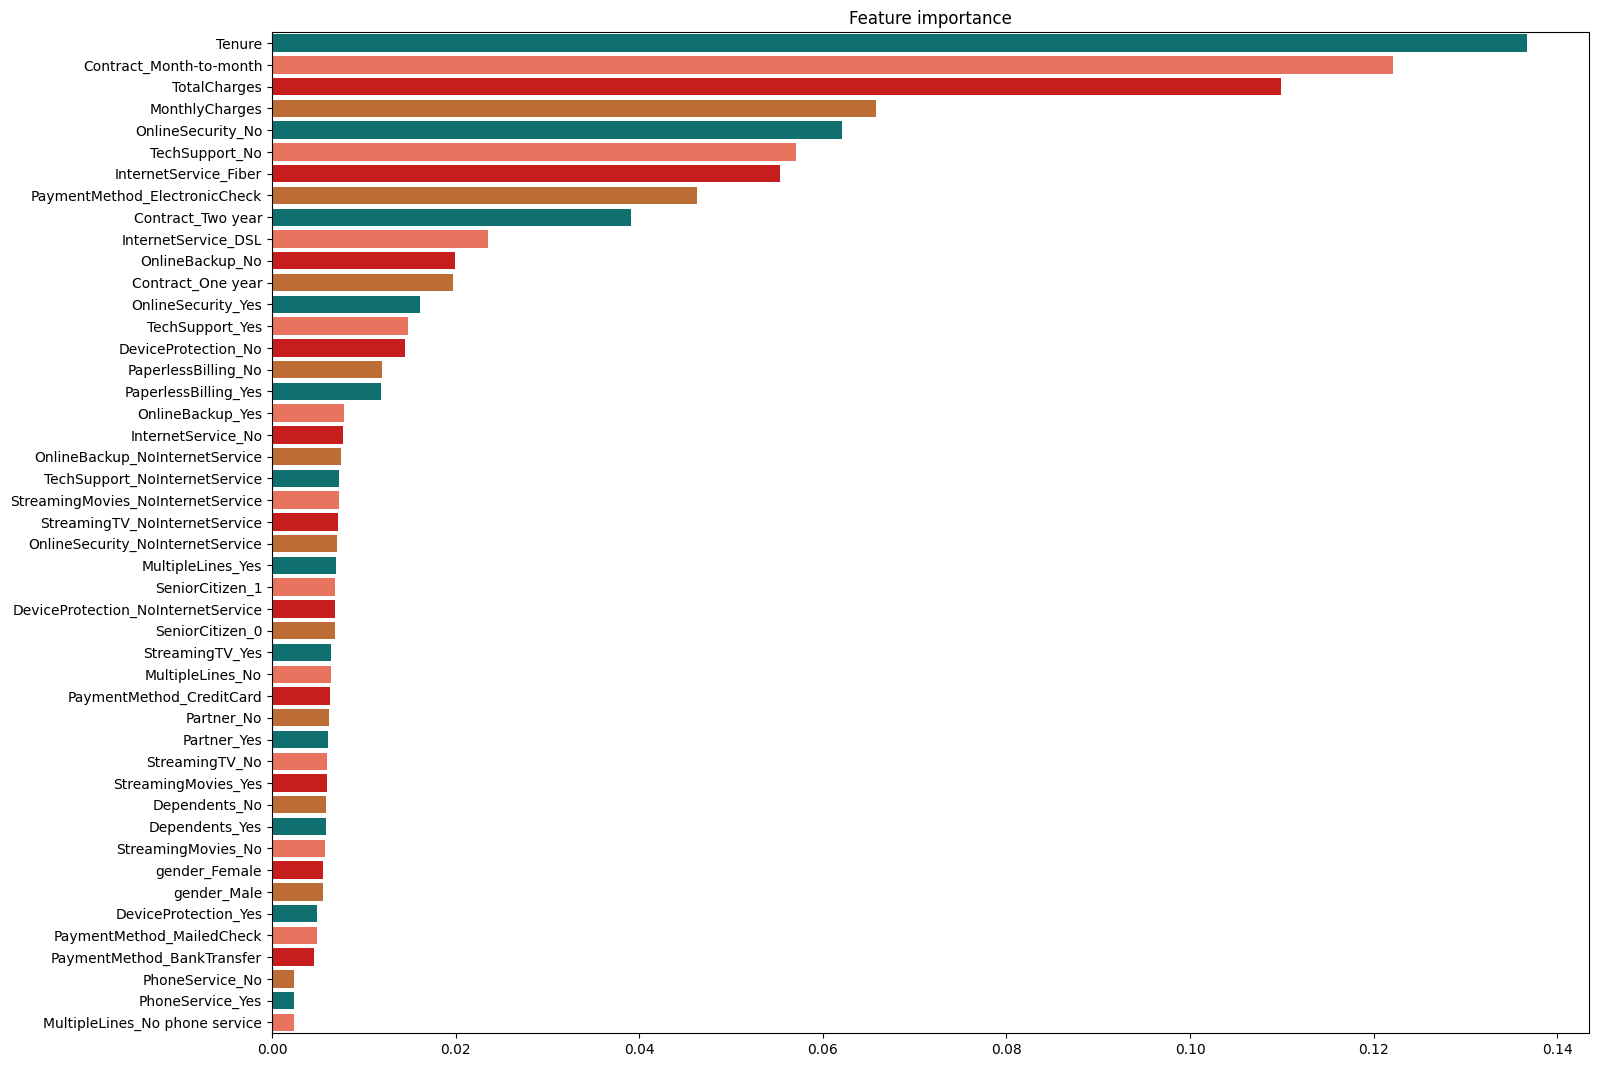

In [196]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=8, min_samples_leaf=3, min_samples_split=3, n_estimators=5000, random_state=13)
clf = clf.fit(X_train, y_train)

fimp = pd.Series(data=clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(17,13))
plt.title("Feature importance")
ax = sns.barplot(y=fimp.index, x=fimp.values, palette=palette, orient='h')


### Baseline - Random Forest

In [197]:
rf = RandomForestClassifier(random_state=13)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [198]:
rf_Recall = recall_score(y_test, y_pred)
rf_Precision = precision_score(y_test, y_pred)
rf_f1 = f1_score(y_test, y_pred)
rf_accuracy = accuracy_score(y_test, y_pred)
rf_roc_auc = roc_auc_score(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1168  121]
 [ 241  223]]


In [199]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1289
           1       0.65      0.48      0.55       464

    accuracy                           0.79      1753
   macro avg       0.74      0.69      0.71      1753
weighted avg       0.78      0.79      0.78      1753



##### K-Fold Cross-validation

In [202]:
from statistics import stdev
score = cross_val_score(rf, X_train, y_train, cv=5, scoring='recall', error_score="raise")
rf_cv_score = score.mean()
rf_cv_stdev = stdev(score)
print('Cross Validation Recall scores are: {}'.format(score))
print('Average Cross Validation Recall score: ', rf_cv_score)
print('Cross Validation Recall standard deviation: ', rf_cv_stdev)

Cross Validation Recall scores are: [0.44444444 0.47311828 0.49640288 0.48920863 0.52329749]
Average Cross Validation Recall score:  0.4852943451690261
Cross Validation Recall standard deviation:  0.029154464510727836


In [203]:
ndf = [(rf_Recall, rf_Precision, rf_f1, rf_accuracy, rf_roc_auc, rf_cv_score, rf_cv_stdev)]

rf_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy', 'ROC-AUC Score', 'Avg CV Recall', 'Standard Deviation of CV Recall'])
rf_score.insert(0, 'Model', 'Random Forest')
rf_score

,Model,Recall,Precision,F1 Score,Accuracy,ROC-AUC Score,Avg CV Recall,Standard Deviation of CV Recall
0,Random Forest,0.480603,0.648256,0.55198,0.793497,0.693366,0.485294,0.029154


##### Interpretation:

- Recall score: 0,48 means that in this particular situation we were able to detect 48% of churning customers. We probably expected more so we need to tune our model. Recall is a very important score in our case.
- Avg CV Recall: 0.48 (the same) means that in an average situation we can expect Recall score at about 0,5 (the higher the better). Our model is probably reliable in terms of bringing recurrent results (the same score). That’s a good news.
- Standard Deviation of CV Recall: 0.03 tell us about expected differences with Recall Score (the lower the better). 0.026 is a good result.
- ROC-AUC Score: 0.70 tells us that the model is quite efficient at distinguishing between the churn customers and not churn customers.
- Accuracy: 0.79 tells us that the number of correct predictions (churn and not churn) made by a model in relation to the total number of predictions are 79%. Accuracy is not a good score for imbalanced data set.
- Precision: 0.65 tells us that when our model predicts a churn customer we have a 67% chance that the prediction is accurate (we detected a churn customer).
- F1 Score: 0.55 tells us how efficient our model is, taking into account both: Recall and Precision scores.

#### Hyperparameter Tuning Using GridSearchCV

Choosing best hyperparameters is based on the algorithm

In [204]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [130], # 'n_estimators': [120,130,150,170,190,200],
    'max_depth': [14],  # 'max_depth': [8,10,12,14,15],
    'min_samples_split': [3], # 'min_samples_split': [3,4,5,6],
    'min_samples_leaf': [2], # 'min_samples_leaf': [1,2,3],
    'random_state': [13]
}

grid_rf = GridSearchCV(rf, param_grid=params, cv=5, scoring='recall').fit(X_train, y_train)

In [205]:
print('Best parameters:', grid_rf.best_params_)
print('Best score:', grid_rf.best_score_)

Best parameters: {'max_depth': 14, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 130, 'random_state': 13}
Best score: 0.5046775482839535


In [206]:
y_pred = grid_rf.predict(X_test)

In [207]:
cm = confusion_matrix(y_test, y_pred)

grid_rf_Recall = recall_score(y_test, y_pred)
grid_rf_Precision = precision_score(y_test, y_pred)
grid_rf_f1 = f1_score(y_test, y_pred)
grid_rf_accuracy = accuracy_score(y_test, y_pred)
grid_roc_auc = roc_auc_score(y_test, y_pred)

print(cm)

[[1161  128]
 [ 238  226]]


####  K-Fold Cross-validation

In [208]:
score2 = cross_val_score(grid_rf, X_train, y_train, cv=5, scoring='recall')

In [209]:
grid_cv_score = score2.mean()
grid_cv_stdev = stdev(score2)

print('Cross Validation Recall scores are: {}'.format(score2))
print('Average Cross Validation Recall score: ', grid_cv_score)
print('Cross Validation Recall standard deviation: ', grid_cv_stdev)

Cross Validation Recall scores are: [0.47670251 0.48028674 0.50359712 0.52158273 0.54121864]
Average Cross Validation Recall score:  0.5046775482839535
Cross Validation Recall standard deviation:  0.027384842018450185


In [210]:
ndf2 = [(grid_rf_Recall, grid_rf_Precision, grid_rf_f1, grid_rf_accuracy, grid_roc_auc, grid_cv_score, grid_cv_stdev)]

grid_score = pd.DataFrame(data = ndf2, columns=
                        ['Recall','Precision','F1 Score', 'Accuracy', 'ROC-AUC Score', 'Avg CV Recall', 'Standard Deviation of CV Recall'])
grid_score.insert(0, 'Model', 'Random Forest after tuning')
grid_score

,Model,Recall,Precision,F1 Score,Accuracy,ROC-AUC Score,Avg CV Recall,Standard Deviation of CV Recall
0,Random Forest after tuning,0.487069,0.638418,0.552567,0.791215,0.693884,0.504678,0.027385


#### Interpretation results after tuning hyperparameters:

- Recall score is better: 0,49 (was: 0,48) - that means that we were able to detect 49% of churning customers.
- Avg CV Recall is better: 0.50 (was: 0.48) - that means that we can expect better average results when it comes to Recall score. This is probably the most important improvement.
- Standard Deviation of CV Recall is almost the same: 0.027 (was: 0.03).
- ROC-AUC Score is: 0.69 - the model is quite efficient at distinguishing between the churn customers and not churn customers.
- Accuracy: 0.79 (the same) - no progress here, but that is not very important.
- Precision: 0,64 (the same) - when our model predicts a churn customer we have a 64% chance that the prediction is accurate (we really detect a churn customer).
- F1 Score: 0.55 - the result is the same.

### Adding another classifier - XGBoost

Random Forest and XGBoost are both decision tree algorithms. I'd like to compare results for further model improvements.

In [211]:
from xgboost import XGBClassifier
XGBC = XGBClassifier()
XGBC.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [212]:
y_pred = XGBC.predict(X_test)

In [213]:
XGBC_Recall = recall_score(y_test, y_pred)
XGBC_Precision = precision_score(y_test, y_pred)
XGBC_f1 = f1_score(y_test, y_pred)
XGBC_accuracy = accuracy_score(y_test, y_pred)
XGBC_roc_auc = roc_auc_score(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1129  160]
 [ 229  235]]


####  K-Fold Cross-validation

In [214]:
score = cross_val_score(XGBC, X_train, y_train, cv=5, scoring='recall', error_score="raise")
XGBC_cv_score = score.mean()
XGBC_cv_stdev = stdev(score)
print('Cross Validation Recall scores are: {}'.format(score))
print('Average Cross Validation Recall score: ', XGBC_cv_score)
print('Cross Validation Recall standard deviation: ', XGBC_cv_stdev)

Cross Validation Recall scores are: [0.47311828 0.4874552  0.54316547 0.5323741  0.4874552 ]
Average Cross Validation Recall score:  0.5047136484360898
Cross Validation Recall standard deviation:  0.030974258006061347


In [215]:
ndf = [(XGBC_Recall, XGBC_Precision, XGBC_f1, XGBC_accuracy, XGBC_roc_auc, XGBC_cv_score, XGBC_cv_stdev)]

XGBC_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy', 'ROC-AUC Score', 'Avg CV Recall', 'Standard Deviation of CV Recall'])
XGBC_score.insert(0, 'Model', 'XGBC')
XGBC_score

,Model,Recall,Precision,F1 Score,Accuracy,ROC-AUC Score,Avg CV Recall,Standard Deviation of CV Recall
0,XGBC,0.506466,0.594937,0.547148,0.778095,0.691169,0.504714,0.030974


#### Interpretation after adding XGBoost Clasifier:

- XGBoost is usually very efficient. Scores that we received from the algorithm tells us that we should probably change something more radically to get better results e.g. introduce oversampling and/or undersampling techniques.
- Recall score is better: 0,50 (was: 0,49).
- Avg CV Recall is the same: 0.50.
- Standard Deviation of CV Recall is worse: 0.03.
- ROC-AUC Score is the same: 0.69.
- Accuracy is worse: 0.78 (was: 0.79).
- Precision: is much worse: 0.59 (was: 0,64).
- F1 Score is the same: 0.55.

##### Hyperparameter Tuning Using GridSearchCV

In [216]:
# Step 1: Searching for the optimum parameters for the learning rate and the number of estimators:
params = {'learning_rate': [0.01], #[0.0001, 0.001, 0.01, 0.1, 0.2, 0.3],
              'subsample': [0.8],
              'colsample_bytree': [0.8],
              'n_estimators': [450] #range(50,500,50),
              }

grid_xgb = GridSearchCV(XGBC, param_grid=params, cv=5, scoring='recall').fit(X_train, y_train)

In [217]:
print('Best parameters:', grid_xgb.best_params_)
print('Best score:', grid_xgb.best_score_)

Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'n_estimators': 450, 'subsample': 0.8}
Best score: 0.5147288620716329


In [218]:
# Step 2: Searching for the optimum parameters for max_depth and min_child_weight:
params = {'max_depth': [7], #range(3,10,2),
              'learning_rate': [0.01],
              'subsample': [0.8],
              'colsample_bytree': [0.8],
              # 'colsample_bylevel': np.arange(0.5, 1.0, 0.1),
              'min_child_weight': [5], #range(1,6,2),
              'n_estimators': [450],
              # 'num_class': [10]
              }

grid_xgb = GridSearchCV(XGBC, param_grid=params, cv=5, scoring='recall').fit(X_train, y_train)

In [219]:
print('Best parameters:', grid_xgb.best_params_)
print('Best score:', grid_xgb.best_score_)

Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 7, 'min_child_weight': 5, 'n_estimators': 450, 'subsample': 0.8}
Best score: 0.5176014027487688


In [220]:
y_pred = grid_xgb.predict(X_test)

In [221]:
grid_xgb_Recall = recall_score(y_test, y_pred)
grid_xgb_Precision = precision_score(y_test, y_pred)
grid_xgb_f1 = f1_score(y_test, y_pred)
grid_xgb_accuracy = accuracy_score(y_test, y_pred)
grid_xgb_roc_auc = roc_auc_score(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1166  123]
 [ 228  236]]


#### K-Fold Cross-validation

In [222]:
score = cross_val_score(grid_xgb, X_train, y_train, cv=5, scoring='recall', error_score="raise")
grid_xgb_cv_score = score.mean()
grid_xgb_cv_stdev = stdev(score)
print('Cross Validation Recall scores are: {}'.format(score))
print('Average Cross Validation Recall score: ', grid_xgb_cv_score)
print('Cross Validation Recall standard deviation: ', grid_xgb_cv_stdev)

Cross Validation Recall scores are: [0.48387097 0.5125448  0.52877698 0.52517986 0.53763441]
Average Cross Validation Recall score:  0.5176014027487688
Cross Validation Recall standard deviation:  0.020898320617817268


In [223]:
ndf = [(grid_xgb_Recall, grid_xgb_Precision, grid_xgb_f1, grid_xgb_accuracy, grid_xgb_roc_auc, grid_xgb_cv_score, grid_xgb_cv_stdev)]

grid_xgb_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy', 'ROC-AUC Score', 'Avg CV Recall', 'Standard Deviation of CV Recall'])
grid_xgb_score.insert(0, 'Model', 'Tuned XGBC')
grid_xgb_score

,Model,Recall,Precision,F1 Score,Accuracy,ROC-AUC Score,Avg CV Recall,Standard Deviation of CV Recall
0,Tuned XGBC,0.508621,0.657382,0.573512,0.799772,0.706599,0.517601,0.020898


#### We were able to improve!

- Recall score is better: 0,51 (was: 0,50).
- Avg CV Recall is better: 0.518 (was 0.504).
- Standard Deviation of CV Recall is better: 0.02 (was 0.03).
- ROC-AUC Score is better: 0.706 (was 0.691).
- Accuracy is almost the same: 0.799 (was: 0.778).
- Precision: is better: 0.657 (was 0.59).
- F1 Score is better: 0.57 (was: 0.55).

In [226]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import CategoricalNB
from sklearn.multioutput import ClassifierChain
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.semi_supervised import LabelPropagation
from sklearn.semi_supervised import LabelSpreading
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neural_network import MLPClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import NearestCentroid
from sklearn.svm import NuSVC
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OutputCodeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import RidgeClassifierCV
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier

from catboost import CatBoostClassifier

In [231]:
estimators = []
estimators.append(('AdaBoostClassifier', AdaBoostClassifier(random_state=13) ))
estimators.append(('Bagging Classifier', BaggingClassifier(random_state=13) ))
estimators.append(('Bernoulli NB', BernoulliNB() ))
estimators.append(('Decision Tree Classifier', DecisionTreeClassifier(random_state=13) ))
estimators.append(('Dummy Classifier', DummyClassifier(random_state=13) ))
estimators.append(('Extra Tree Classifier', ExtraTreeClassifier(random_state=13) ))
estimators.append(('Extra Trees Classifier', ExtraTreesClassifier(random_state=13) ))
estimators.append(('Gaussian NB', GaussianNB() ))
estimators.append(('Gaussian Process Classifier', GaussianProcessClassifier(random_state=13) ))
estimators.append(('Gradient Boosting Classifier', GradientBoostingClassifier(random_state=13) ))
estimators.append(('Hist Gradient Boosting Classifier', HistGradientBoostingClassifier(random_state=13) ))
estimators.append(('KNN', KNeighborsClassifier() ))
estimators.append(('Label Propagation', LabelPropagation() ))
estimators.append(('Label Spreading', LabelSpreading() ))
estimators.append(('LogisticRegression', LogisticRegression(max_iter=1000, random_state=13)))
estimators.append(('Logistic Regression CV', LogisticRegressionCV(max_iter=1000, random_state=13) ))
estimators.append(('MLPClassifier', MLPClassifier(max_iter=2000,random_state=13) ))
estimators.append(('Nearest Centroid', NearestCentroid() ))
estimators.append(('Passive Aggressive Classifier', PassiveAggressiveClassifier(random_state=13) ))
estimators.append(('Perceptron', Perceptron(random_state=13) ))

estimators.append(('RandomForest', RandomForestClassifier(max_depth= 10, min_samples_leaf= 1, min_samples_split= 3, n_estimators= 170, random_state=13) ))
estimators.append(('Ridge Classifier', RidgeClassifier(random_state=13) ))
estimators.append(('Ridge Classifier CV', RidgeClassifierCV() ))
estimators.append(('SGDClassifier', SGDClassifier(random_state=13) ))
estimators.append(('SVC', SVC(random_state=13)))
estimators.append(('XGB', XGBClassifier(random_state=13) ))
estimators.append(('CatBoost', CatBoostClassifier(logging_level='Silent', random_state=13) ))

In [243]:
VC_hard = VotingClassifier(estimators = estimators, voting ='hard')
VC_hard.fit(X_train, y_train)
y_pred = VC_hard.predict(X_test)

import warnings
warnings.filterwarnings('ignore')

In [235]:
VC_hard_Recall = recall_score(y_test, y_pred)
VC_hard_Precision = precision_score(y_test, y_pred)
VC_hard_f1 = f1_score(y_test, y_pred)
VC_hard_accuracy = accuracy_score(y_test, y_pred)
VC_hard_roc_auc = roc_auc_score(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1168  121]
 [ 227  237]]


####  K-Fold Cross-validation

In [238]:
score = cross_val_score(VC_hard, X_train, y_train, cv=5, scoring='recall', error_score="raise")
VC_hard_cv_score = score.mean()
VC_hard_cv_stdev = stdev(score)
print('Cross Validation Recall scores are: {}'.format(score))
print('Average Cross Validation Recall score: ', VC_hard_cv_score)
print('Cross Validation Recall standard deviation: ', VC_hard_cv_stdev)

Cross Validation Recall scores are: [0.48387097 0.46594982 0.50359712 0.5323741  0.53046595]
Average Cross Validation Recall score:  0.5032515922745675
Cross Validation Recall standard deviation:  0.02896503024789407


In [239]:
ndf = [(VC_hard_Recall, VC_hard_Precision, VC_hard_f1, VC_hard_accuracy, VC_hard_roc_auc, VC_hard_cv_score, VC_hard_cv_stdev)]

VC_hard_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy', 'ROC-AUC Score', 'Avg CV Recall', 'Standard Deviation of CV Recall'])
VC_hard_score.insert(0, 'Model', 'Voting Clasifier - Hard Voting')
VC_hard_score

,Model,Recall,Precision,F1 Score,Accuracy,ROC-AUC Score,Avg CV Recall,Standard Deviation of CV Recall
0,Voting Clasifier - Hard Voting,0.510776,0.662011,0.576642,0.801483,0.708452,0.503252,0.028965


#### This time we weren't able to improve.

- Recall score is almost the same: 0.510 (was: 0.508).
- Avg CV Recall is worse: 0.501 (was: 0.517).
- Standard Deviation of CV Recall is the same: 0.02.
- ROC-AUC Score is almost the same: 0.708 (was: 0.706).
- Accuracy is almost the same: 0.80.
- Precision: is almost the same: 0.66.
- F1 Score is almost the same: 0.577).


<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700"><span style='color:#CDA63A'></span> Result comparison </div>

In [241]:
predictions = pd.concat([rf_score, grid_score, XGBC_score, grid_xgb_score, VC_hard_score], ignore_index=True, sort=False)
predictions.sort_values(by=['Avg CV Recall'], ascending=False)

,Model,Recall,Precision,F1 Score,Accuracy,ROC-AUC Score,Avg CV Recall,Standard Deviation of CV Recall
3,Tuned XGBC,0.508621,0.657382,0.573512,0.799772,0.706599,0.517601,0.020898
2,XGBC,0.506466,0.594937,0.547148,0.778095,0.691169,0.504714,0.030974
1,Random Forest after tuning,0.487069,0.638418,0.552567,0.791215,0.693884,0.504678,0.027385
4,Voting Clasifier - Hard Voting,0.510776,0.662011,0.576642,0.801483,0.708452,0.503252,0.028965
0,Random Forest,0.480603,0.648256,0.551980,0.793497,0.693366,0.485294,0.029154



## <b> <span  style='color:#E1B12D'> Conclusion </span><b>


Based on the performance metrics of different machine learning models, it can be concluded that the tuned XGBoost Classifier outperformed the other models in predicting customer churn. The model achieved a recall of 0.510, precision of 0.654, F1 score of 0.573, accuracy of 0.799, and ROC-AUC score of 0.707. It also had the highest average cross-validation recall score of 0.511 with a standard deviation of 0.027, indicating that it is a stable and reliable model. However, it is important to note that the performance of these models may vary depending on the specific dataset and problem, and further analysis and fine-tuning may be necessary for optimal results.The most important feature in predicting customer churn was found to be the tenure of the customer.